<a href="https://colab.research.google.com/github/connect-midhunr/zomato-restaurant-clustering-and-sentiment-analysis/blob/main/notebooks/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# Business Task

Analyze the metadata and reviews of popular restaurants in Hyderabad and build machine learning models to cluster the restaurants into different segments based on cuisines and analyze the sentiments of the reviews given by the customers. 

# Data Summary

## Restaurant Metadata

In [1]:
# reading data and storing in dataframe
import pandas as pd

meta_df = pd.read_csv('../data/Zomato Restaurant names and Metadata.csv')

In [2]:
# exploring the head of the dataframe
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [3]:
# brief summary of the dataframe
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


All features are categorical.

In [4]:
# function to find the number of duplicate rows
def duplicate_rows_count(dataframe):
  """
  Returns the number of duplicate rows in the dataframe.
  """
  return dataframe[dataframe.duplicated()].shape[0]

In [5]:
# total number of rows in the dataframe
print(f"Total number of rows: {meta_df.shape[0]}")

# number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows_count(meta_df)}")

Total number of rows: 105
Number of duplicate rows: 0


*   The dataframe contains 105 rows and has zero duplicate rows.

In [6]:
# information of features
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


*   The dataframe contains 6 columns.
*   Two columns have missing values.
*   Two columns requires conversion of datatype.

## Restaurant Review Data

In [7]:
# reading data and storing in dataframe
review_df = pd.read_csv('../data/Zomato Restaurant reviews.csv')

In [8]:
# exploring the head of the dataframe
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [9]:
# brief summary of the dataframe
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


All features are categorical except Pictures.

In [10]:
# total number of rows in the dataframe
print(f"Total number of rows: {review_df.shape[0]}")

# number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows_count(review_df)}")

Total number of rows: 10000
Number of duplicate rows: 36


*   The dataframe contains 10000 rows and has 36 duplicate rows.

In [11]:
# information of features
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


*   The dataframe contains 7 columns.
*   Five columns have missing values.
*   Three columns require conversion of datatype.

# Data Cleaning

Let's take a copy of both the datasets and work on them so that the original data don't get modified.

In [12]:
# copyong datasets
meta_work_df = meta_df.copy()
review_work_df = review_df.copy()

## Removing Duplicate Rows

There are no duplicate rows to remove in restaurant metadata but it was found that there are 36 duplicate rows in review dataset. Let's remove these 36 rows of data.

In [13]:
# removing duplicate rows
review_work_df.drop_duplicates(inplace=True)

In [14]:
# number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows_count(review_work_df)}")

Number of duplicate rows: 0


## Handling Missing Values

In [15]:
# defining a function to find the number and percentage of missing values
def missing_values_count_percent(dataframe):
  """
  Returns the number and percentage of missing values in each column in the dataframe if present
  """
  num = 0
  for column in dataframe.columns:
    count = dataframe[column].isnull().sum()
    percentage = round(count/dataframe.shape[0]*100, 2)
    if count > 0:
      print(f"{column}: {count}({percentage}%)")
      num += 1
  if num == 0:
    print("There are no missing values in the dataframe.")

Let's find the number of missing values in the restaurant metadata.

In [16]:
# number of missing values in restaurant metadata
missing_values_count_percent(meta_work_df)

Collections: 54(51.43%)
Timings: 1(0.95%)


More than half of the observations of restaurant metadata have missing values in Collections. Imputing missing values in this feature is possible only by collecting more data. The values in this feature are just tags for optimizing search results and they won't be useful for clustering. So let's remove this feature altogether since it will lead to inaccurate data analysis.

In [17]:
# dropping Collections
meta_work_df.drop('Collections', inplace=True, axis=1)

There is only 1 missing value in Timings. Let's check in which row it occurs.

In [18]:
# the row in which Timings is null
meta_work_df[meta_work_df['Timings'].isnull()]

,Name,Links,Cost,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,"Andhra, South Indian, North Indian",NaN


Let's impute the missing value with the mode of Timings.

In [19]:
# imputing missing value with mode
meta_work_df.fillna(meta_work_df['Timings'].mode()[0], inplace=True)

In [20]:
# number of missing values in restaurant metadata
missing_values_count_percent(meta_work_df)

There are no missing values in the dataframe.


Let's find the number of missing values in the review dataset.

In [21]:
# number of missing values in review dataset
missing_values_count_percent(review_work_df)

Reviewer: 2(0.02%)
Review: 9(0.09%)
Rating: 2(0.02%)
Metadata: 2(0.02%)
Time: 2(0.02%)


Since this is a very small amount of data and sentiment analysis cannot be done without reviews, let's remove these observations.

In [22]:
# dropping rows which have missing values
review_work_df.dropna(inplace=True)

In [23]:
# number of missing values in review dataset
missing_values_count_percent(review_work_df)

There are no missing values in the dataframe.


## Conversion of Column Datatype

Let's convert the data type of Cost in restaurant metadata to int.

In [24]:
# converting the datatype of Cost from object to float
meta_work_df['Cost'] = meta_work_df['Cost'].str.replace(',', '')
meta_work_df = meta_work_df.astype({'Cost':float})

The datatype of Cuisines in restaurant metadata needs to be converted to list for easier analysis.

In [25]:
# converting the datatype of Cuisines from object to list
meta_work_df['Cuisines'] = meta_work_df['Cuisines'].str.split(', ')

# exploring the head of the dataframe
meta_work_df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800.0,"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300.0,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800.0,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200.0,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


The datatype of Rating in review dataset is supposed to be float. But it is of object datatype. The unique values in Rating should be checked to see why this happened.

In [26]:
# unique values in Rating
print(review_work_df['Rating'].unique())

['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like']


The datatype of Rating was determined as object due to the presense of 'Like'. Lets replace 'Like' with an appropriate rating of 3.5.

In [27]:
# replacing 'Like' with 3.5
review_work_df['Rating'] = review_work_df['Rating'].replace('Like', 3.5)

# converting datatype of Rating to float
review_work_df = review_work_df.astype({'Rating':float})

The most appropriate datatype for Metadata in review dataset is dictionary. So let's convert the daytype of Metadata to dictionary with keys 'Review' and 'Followers'.

In [28]:
# defining a function for applying to each row for converting Metadata to dictionary
def convert_to_metadata_dict(val):
  """
  A function to convert the datatype of Metadata to dictionary
  """
  split_val = str(val).split()
  metadata_dict = {'Reviews':int(split_val[0]), 'Followers':0}
  if len(split_val) > 2:
    metadata_dict['Followers'] = int(split_val[3])
  return metadata_dict

# applying function to each value in Metadata
review_work_df['Metadata'] = review_work_df['Metadata'].apply(lambda x : convert_to_metadata_dict(x))

# exploring the head of the dataframe
review_work_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"{'Reviews': 1, 'Followers': 2}",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"{'Reviews': 3, 'Followers': 2}",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"{'Reviews': 2, 'Followers': 3}",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"{'Reviews': 1, 'Followers': 1}",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"{'Reviews': 3, 'Followers': 2}",5/24/2019 21:37,0


Let's convert the data type of Time in review dataset to datetime.

In [29]:
# converting the datatype of Time from object to datetime
review_work_df['Time'] = pd.to_datetime(review_work_df['Time'])

# Exploratory Data Analysis

In [30]:
# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# filtering warining
import warnings
warnings.filterwarnings('ignore')

## Most Expensive Restaurants

In [31]:
# defining a function to plot a vertical bar graph
def plot_vertical_bar_graph(dataframe, x, y, title=None):
  """
  Plots a vertical bar graph with 
  dataframe[x] as x-axis data 
  and dataframe[y] as y-axis data
  """
  plt.figure(figsize=(16, 6))
  sns.barplot(data=dataframe, x=x, y=y)
  if dataframe[x].str.len().max() > (150/dataframe[x].shape[0]):
    plt.xticks(rotation=90)
  if title is not None:
    plt.title(title)
  plt.show()

Let's find out the 10 most expensive restaurants in the dataset.

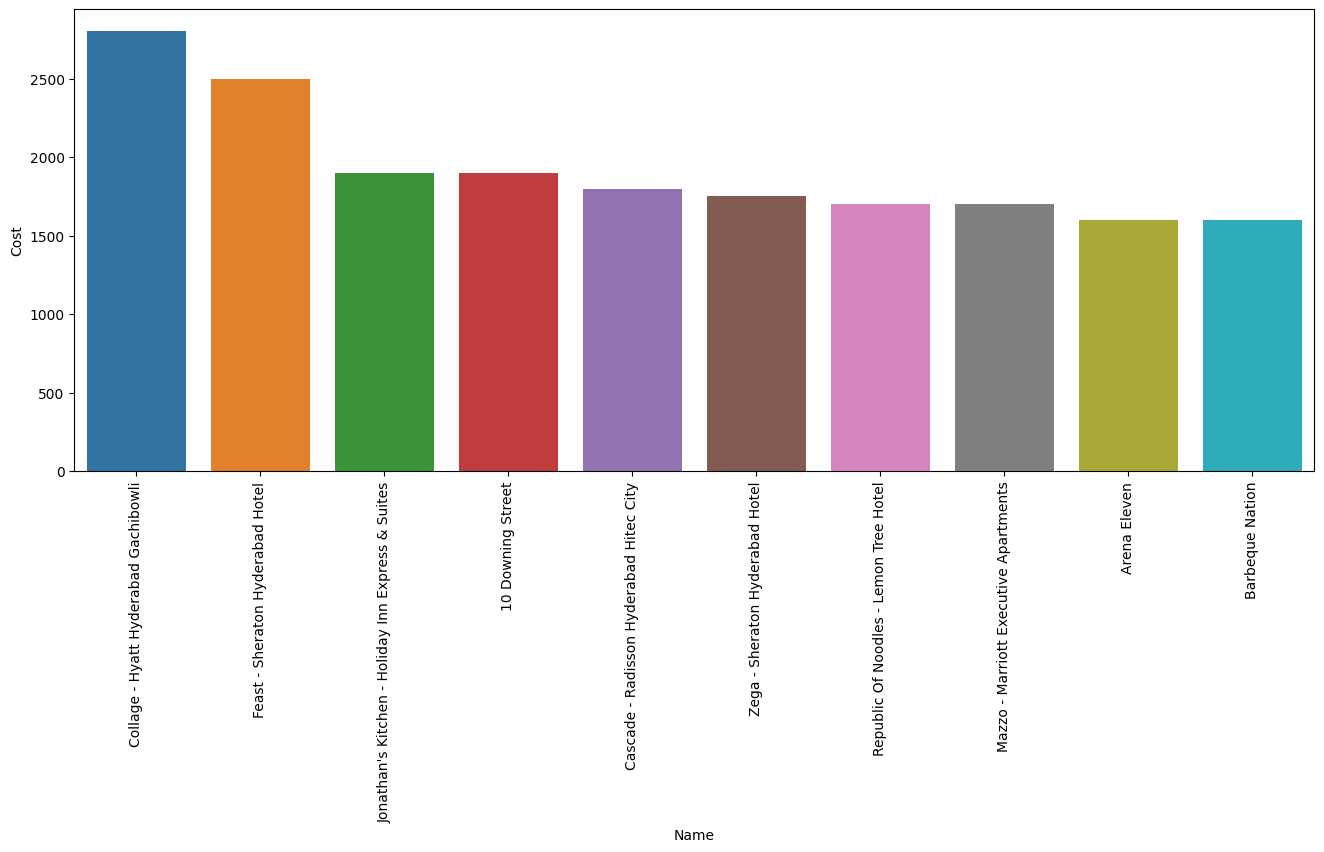

In [32]:
# plotting a vertical bar graph to display the top 10 most expensive restaurants
value = plot_vertical_bar_graph(meta_work_df.sort_values('Cost', ascending=False).head(10), 'Name', 'Cost')

Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant followed by Feast - Sheraton Hyderabad Hotel.

## Most Affordable Restaurants

Let's find out 10 most affordable restaurants in the dataset

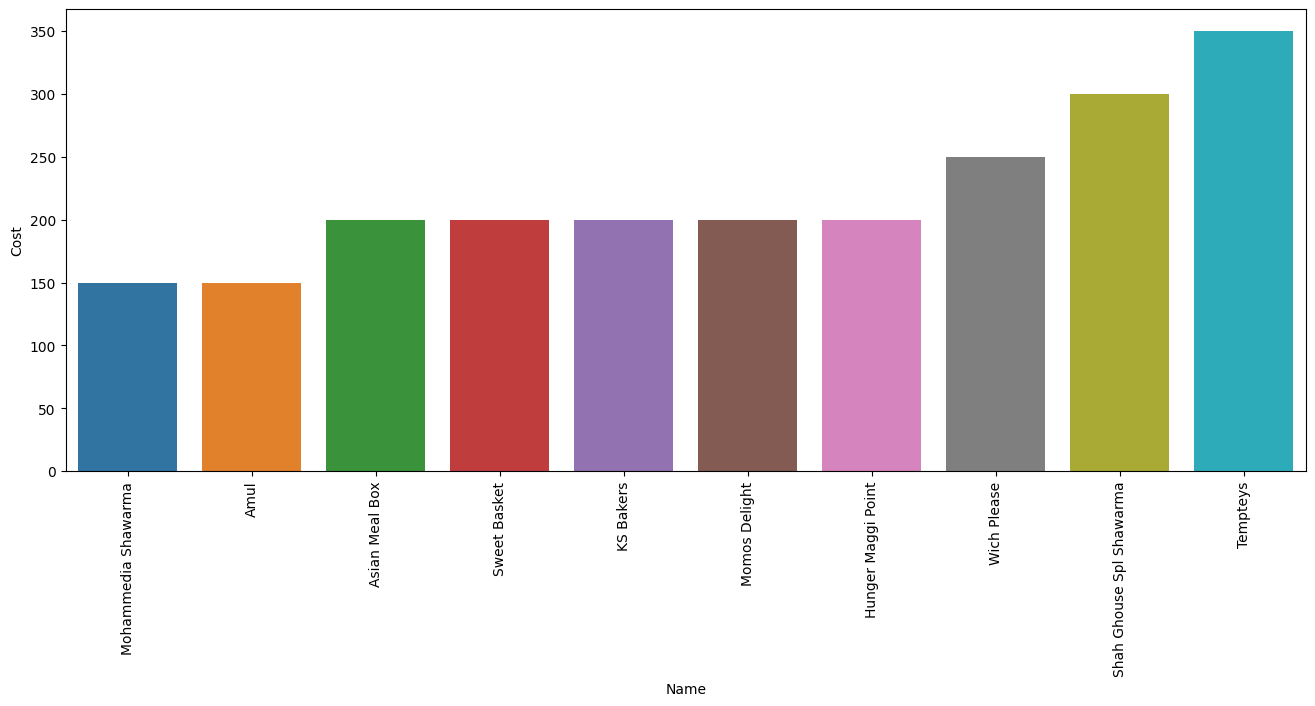

In [33]:
# plotting a vertical bar graph to display the top 10 most affordable restaurants
plot_vertical_bar_graph(meta_work_df.sort_values('Cost').head(10), 'Name', 'Cost')

Mohammedia Shawarma and Amul are the most affordable restaurants among the 105 restaurants in the dataset.

## Most Popular Cuisines

Let's check the 10 most popular cuisines by availability among all the restaurants.

In [34]:
# creating a dictionary to store the number of restaurants a particular cuisine 
# is served
cuisine_count = {'Cuisine':[], 'Count':[]}
for cuisine_list in meta_work_df.Cuisines:
  for cuisine in cuisine_list:
    if cuisine not in cuisine_count['Cuisine']:
      cuisine_count['Cuisine'].append(cuisine)
      cuisine_count['Count'].append(1)
    else:
      cuisine_count['Count'][cuisine_count['Cuisine'].index(cuisine)] += 1

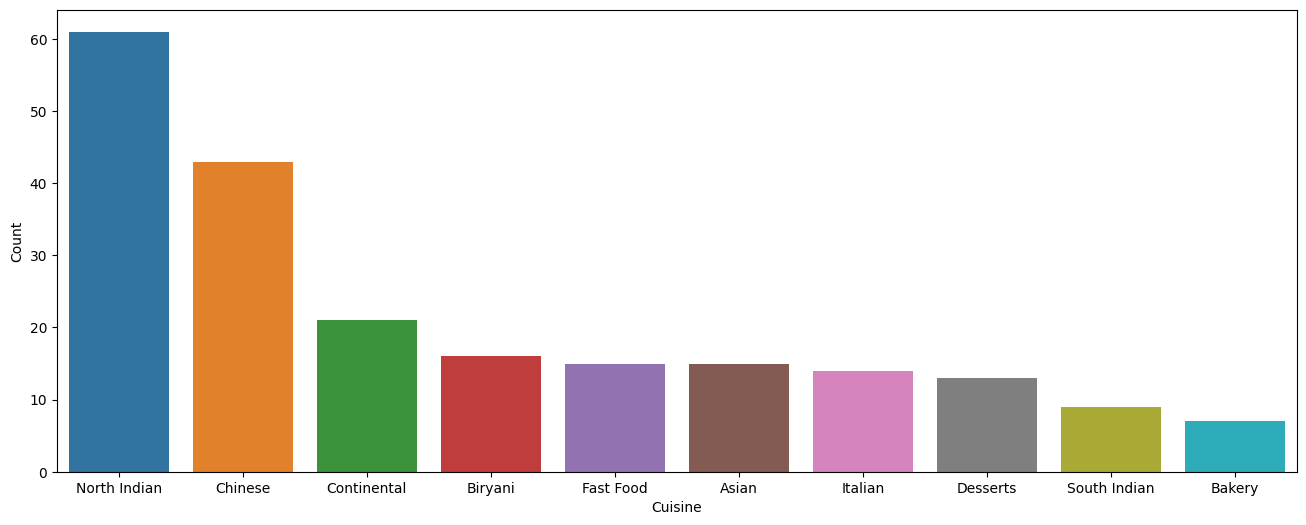

In [35]:
# converting the cuisine count dictionary to a dataframe with 10 most available cuisines
cuisine_count_most_df = pd.DataFrame(cuisine_count).sort_values('Count', ascending=False).head(10)

# plotting a vertical bar graph to display the most available cuisines
plot_vertical_bar_graph(cuisine_count_most_df, 'Cuisine', 'Count')

North Indian is the most popular cuisine by availability, followed by Chinese.


## Distribution of Ratings

Let's create a histogram to check the distribution of ratings for all restaurants.

In [36]:
# defining a function to generate histogram of a feature in a dataframe
def plot_histogram_of_a_feature(dataframe, feature):
  """
  Plots a histogram with dataframe[feature]
  """
  plt.figure(figsize=(8, 4))
  plt.hist(dataframe[feature], bins=range(1, int(dataframe[feature].max()) + 2))
  plt.show()

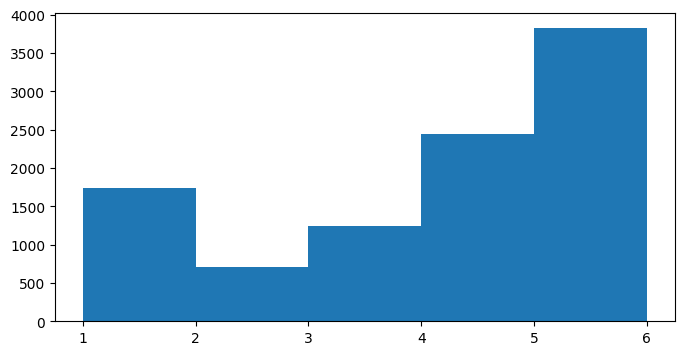

In [37]:
# generating a histogram to display the distribution of values in Rating
plot_histogram_of_a_feature(review_work_df, 'Rating')

It is found the interval between 4 and 5 has the most frequency of Rating.

## Most Experienced Reviewer

Let's find out the 10 reviewers who wrote the most number of reviewers. For that we need to extract the number of reviews and followers from the metadata dictionary. 

In [38]:
# creating a dataframe to store the name and the number of reviews written by the reviewer
review_metadata_df = review_work_df.loc[:, ['Reviewer', 'Metadata']]

# converting the datatype of Metadata to string before removing duplicate rows
# since dictionary is an immutable object, it cannot be hashed
review_metadata_df = review_metadata_df.astype({'Metadata':str})

# dropping duplicate rows to metadata of unique reviewers
review_metadata_df.drop_duplicates(inplace=True)

# converting the datatype of Metadata back to dictionary
review_metadata_df['Metadata'] = review_metadata_df['Metadata'].apply(lambda x : eval(x))

# creating separate features for Reviews and Followers in Metadata
review_metadata_df['Reviews'] = review_metadata_df['Metadata'].apply(lambda x : x['Reviews'])
review_metadata_df['Followers'] = review_metadata_df['Metadata'].apply(lambda x : x['Followers'])

# dropping Metadata as it become redundant
review_metadata_df.drop('Metadata', inplace=True, axis=1)

# exploring the head of the dataframe
review_metadata_df.head(3)

,Reviewer,Reviews,Followers
0,Rusha Chakraborty,1,2
1,Anusha Tirumalaneedi,3,2
2,Ashok Shekhawat,2,3


Now that we have extracted the number of reviews and follwers from Metadata, let's plot the graph.

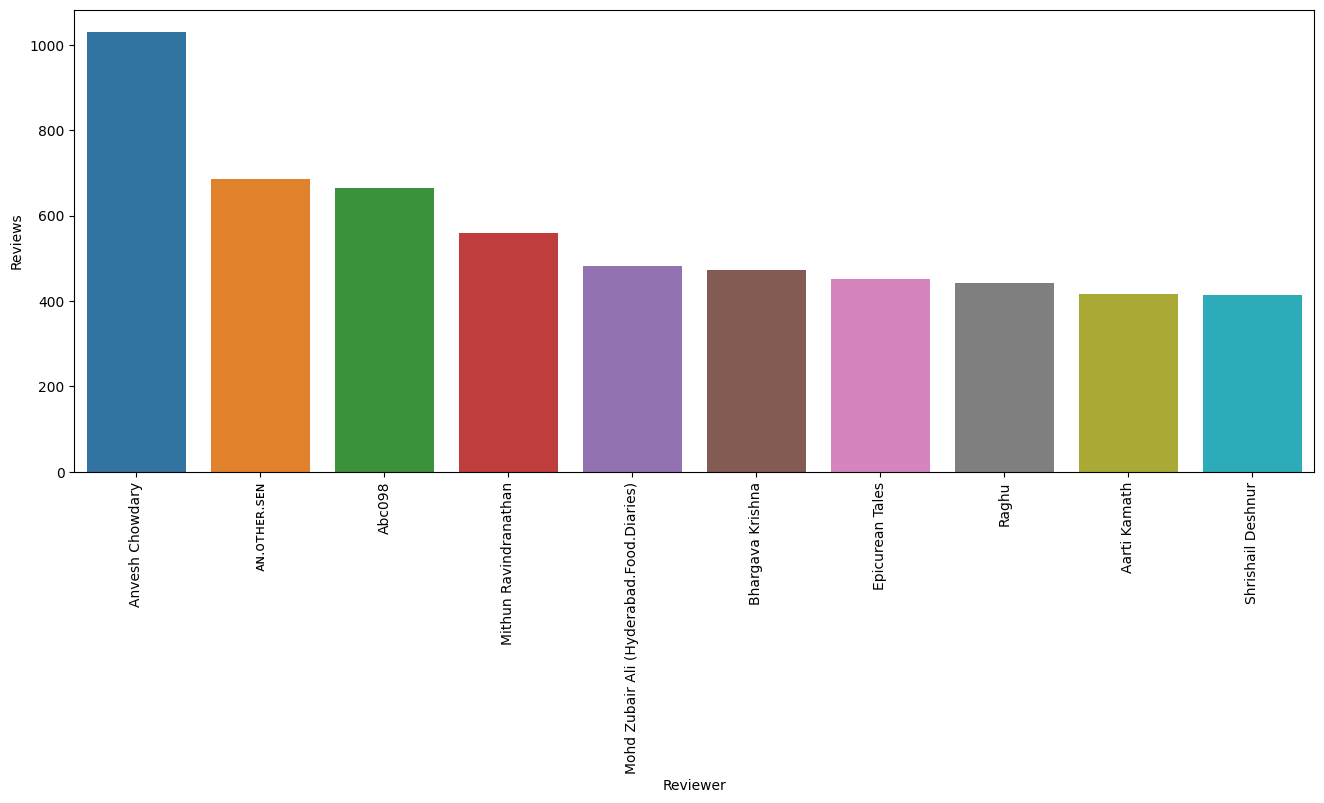

In [39]:
# plotting a vertical bar graph to display the reviewers who wrote the most number of reviews
plot_vertical_bar_graph(review_metadata_df.sort_values('Reviews', ascending=False).head(10), 'Reviewer', 'Reviews')

Anvesh Chowdary has written the most number of reviews with over 1000 reviews.

## Most Popular Reviewer

Let's find out the 10 reviewers who has the most number of followers. 

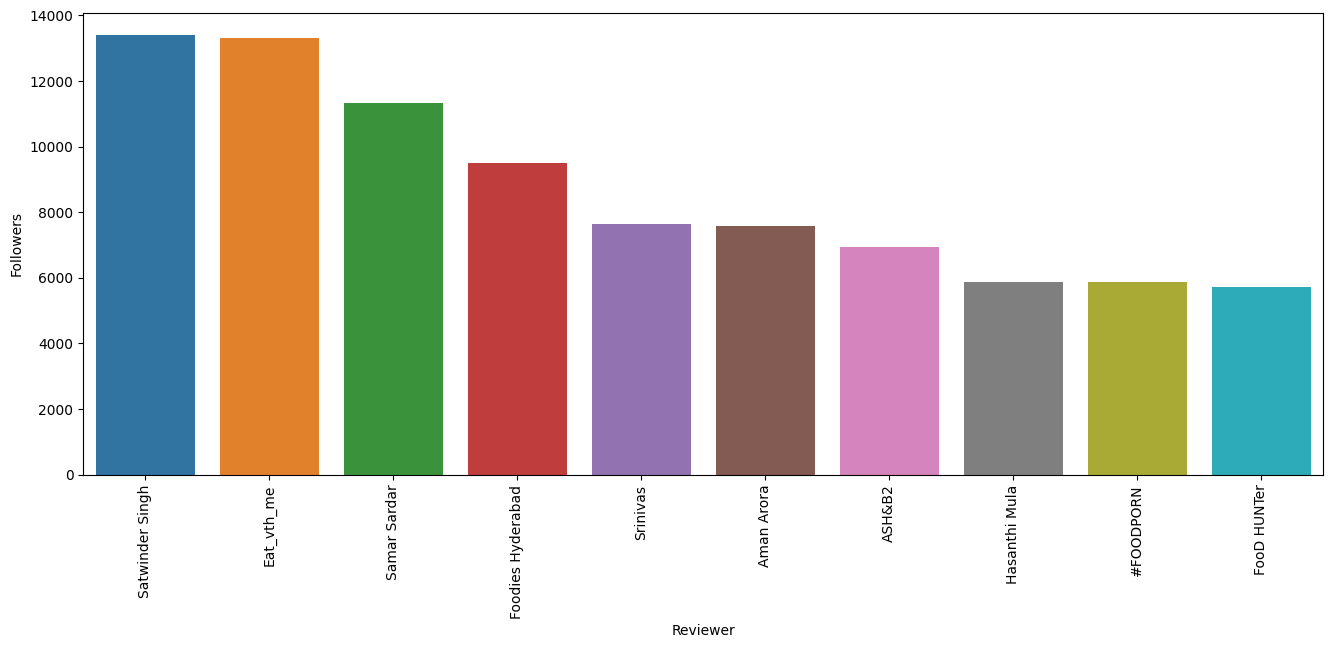

In [40]:
# plotting a vertical bar graph to display the reviewers who wrote the most number of reviews
plot_vertical_bar_graph(review_metadata_df.sort_values('Followers', ascending=False).head(10), 'Reviewer', 'Followers')

Satwinder Singh is the most popular reviewer based on the number of followers.

## Most Reviewed Restaurant

Let's check the 10 restaurants that were reviewed the most number of times.

In [41]:
# creating a dataframe to store the 10 most reviewed restaurants
most_reviewed_restaurants_df = pd.DataFrame(review_work_df['Restaurant'].value_counts()).reset_index()
most_reviewed_restaurants_df = most_reviewed_restaurants_df.rename(columns={'index':'Restaurant', 'Restaurant':'Reviews'})

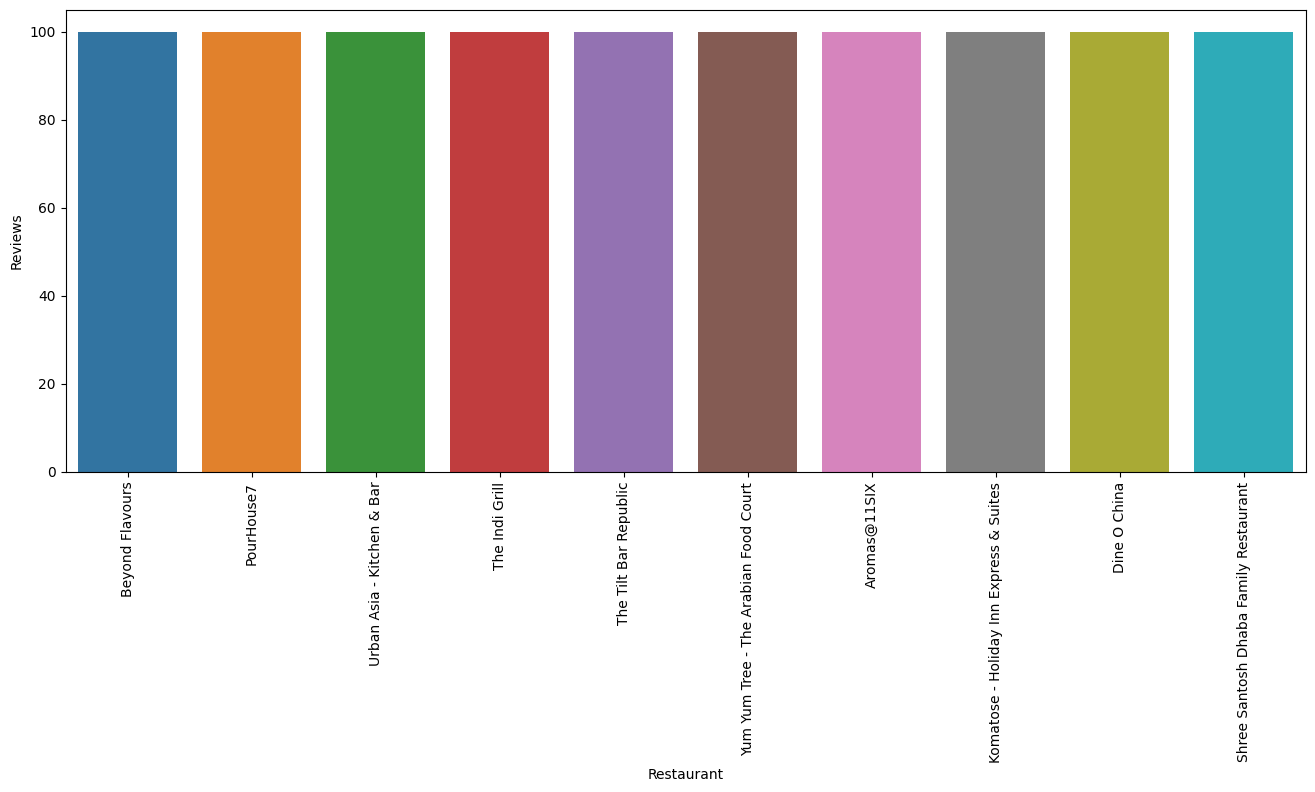

In [42]:
# plotting a vertical bar graph to display the restaurants which was reviewed the most number of times
plot_vertical_bar_graph(most_reviewed_restaurants_df.head(10), 'Restaurant', 'Reviews')

It is observed that all the 10 most reviewed restaurants have the same number of reviews, which is 100. Let's check the distribution of number of reviews.

In [43]:
# defining a function to generate density plot of a feature in a dataframe
def plot_density_of_a_feature(dataframe, feature):
  """
  Plots a density plot with dataframe[feature]
  """
  plt.figure(figsize=(8, 6))
  sns.distplot(dataframe[feature])
  plt.show()

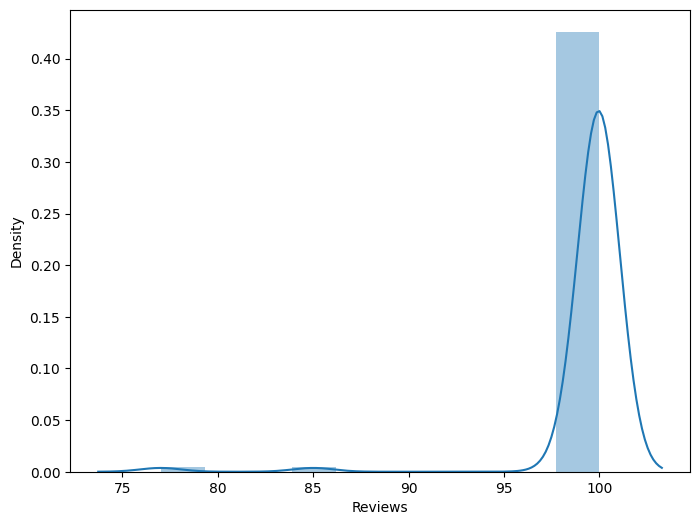

In [44]:
# generating a density plot to display the distribution of number of Reviews
plot_density_of_a_feature(most_reviewed_restaurants_df, 'Reviews')

The distribution of the number of reviews each restaurant has is negatively skewed with a long tail and a narrow curve. Almost all restaurants have 100 reviews.

## Highest Rated Restaurants

Let's check the 10 restaurants that have the greatest average rating.

In [45]:
# creating a dataframe to store the 10 highest rated restaurants
highest_rated_restaurants_df = pd.DataFrame(review_work_df.groupby('Restaurant').mean()['Rating']).reset_index()
highest_rated_restaurants_df = highest_rated_restaurants_df.sort_values('Rating', ascending=False).head(10)

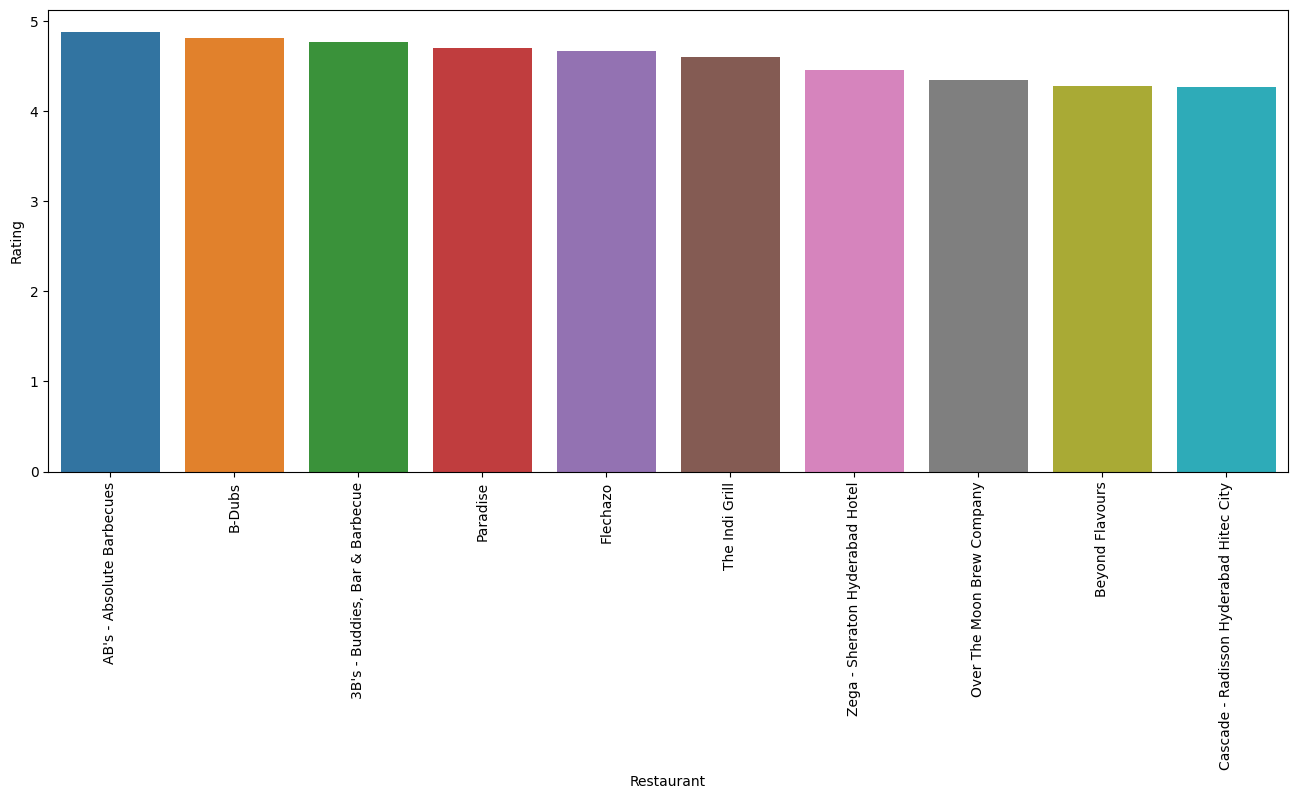

In [46]:
# plotting a vertical bar graph to display the restaurants which has the greatest average rating
plot_vertical_bar_graph(highest_rated_restaurants_df, 'Restaurant', 'Rating')

AB's - Absolute Barbecues has the highest average rating followed by B-Dubs	and 3B's - Buddies, Bar & Barbecue.

## Review Wordcloud

Let's create a wordcloud to check the frequency of different words in the reviews. First let's carry out tokenization and stopword removal of the text data.

In [47]:
# importing libraries for text processing
import re
import nltk
from stop_words import get_stop_words

In [62]:
# defining a function for text tokenization and stopword removal
def tokenize(text):
  """
  Function to carry out tokenization and stopword removal of text data
  """

  # converting from object to string
  mod_text = str(text)

   # removing punctuations
  mod_text = re.sub('[^a-zA-Z]', ' ', mod_text)

  # converting all characters to lower case and splitting into words
  mod_text = mod_text.lower().split()

  # removing stopwords
  mod_text = [word for word in mod_text if word not in get_stop_words('english')]

  return mod_text

In [63]:
# carrying out tokenization and stopword removal of text data
review_work_df['Tokenized_Review'] = review_work_df.Review.apply(lambda x : tokenize(x))

Now that we have tokenized the review data and removed stop words, let's generate a word cloud of the review.

In [53]:
# importing library for wordcloud
from wordcloud import WordCloud

In [54]:
# defining a function to generate wordcloud
def generate_wordcloud(text):
  """
  Function to generate wordcloud from text
  """
  wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(text)
  plt.figure(figsize=(8, 8), facecolor=None)
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

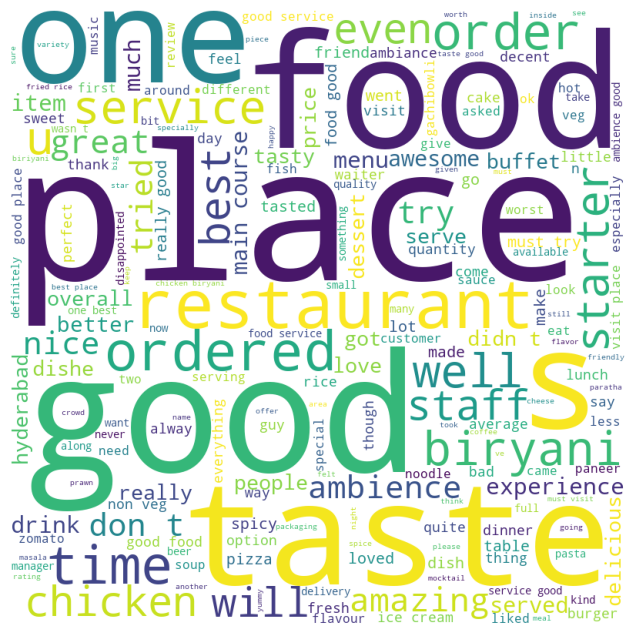

In [64]:
# collecting all words from the reviews to generate the wordcloud
cloud_words = ''
for words in review_work_df.Tokenized_Review:
  cloud_words += ' '.join(words)

# generating wordcloud image of reviews
generate_wordcloud(cloud_words)

Most frequent words used by the reviewers are place, good, food and taste.

## Cost vs Rating

Let's check the variation of ratings with respect to the cost of food. Lets merge Cost from restaurant metadata with Rating from review dataset on Restaurant Name as common feature.

In [65]:
# merging the datasets
cost_rating_df = review_work_df.loc[:, ['Restaurant', 'Rating']].merge(right=meta_work_df.loc[:, ['Name','Cost']], left_on='Restaurant', right_on='Name')
cost_rating_df.drop('Name', axis=1, inplace=True)

# exploring the head of the dataframe
cost_rating_df.head()

,Restaurant,Rating,Cost
0,Beyond Flavours,5.0,800.0
1,Beyond Flavours,5.0,800.0
2,Beyond Flavours,5.0,800.0
3,Beyond Flavours,5.0,800.0
4,Beyond Flavours,5.0,800.0


In [66]:
# defining a function to generate a scatter plot
def plot_scatter_plot(dataframe, x, y):
  """
  Plots a scatter plot with 
  dataframe[x] as x-axis data 
  and dataframe[y] as y-axis data
  """
  plt.figure(figsize=(16, 6))
  sns.scatterplot(data=dataframe, x=x, y=y)
  plt.show()

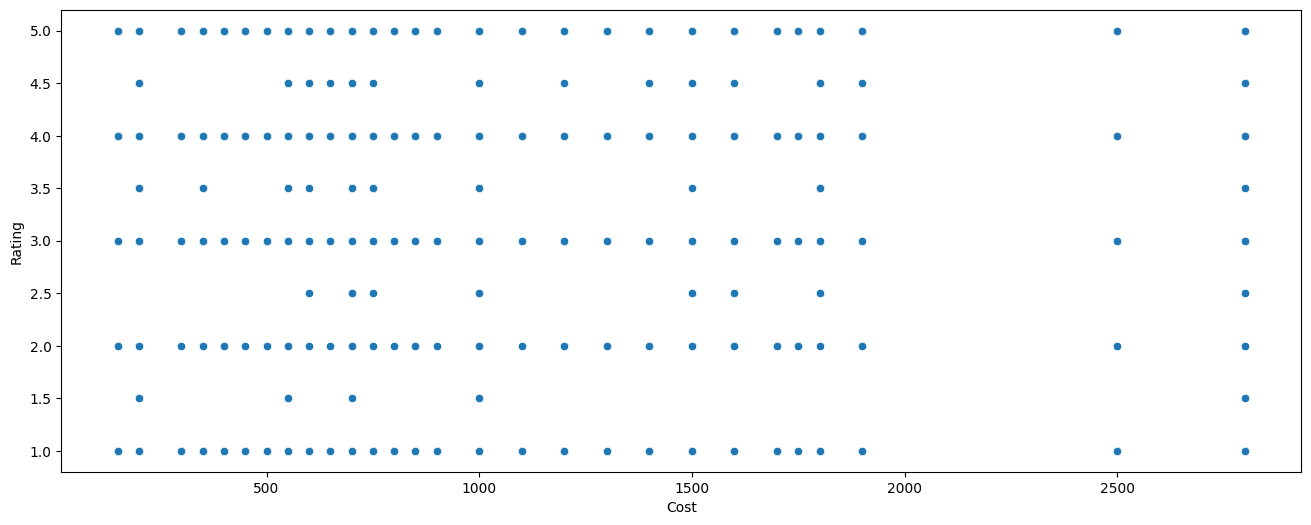

In [67]:
# generating a scatter plot to display the variation of ratings with respect to cost
plot_scatter_plot(cost_rating_df, 'Cost', 'Rating')

It is observed that there is no relationship between the rating of restaurants and the cost of food.

## Cost vs Average Rating

Let's check the variation of average ratings with respect to the cost of food. Lets calculate the average ratings from review dataset and merge it with Cost from restaurant metadata on Restaurant Name as common feature.

In [68]:
# creating a dataframe to store the average rating of the restaurants
avg_rating = pd.DataFrame(review_work_df.groupby('Restaurant').mean()['Rating']).reset_index()

# merging the datasets
cost_avg_rating_df = avg_rating.loc[:, ['Restaurant', 'Rating']].merge(right=meta_work_df.loc[:, ['Name','Cost']], left_on='Restaurant', right_on='Name')
cost_avg_rating_df = cost_avg_rating_df.rename(columns={'Rating':'Average Rating'})
cost_avg_rating_df.drop('Name', axis=1, inplace=True)

# exploring the head of the dataframe
cost_avg_rating_df.head()

,Restaurant,Average Rating,Cost
0,10 Downing Street,3.80,1900.0
1,13 Dhaba,3.48,450.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
3,AB's - Absolute Barbecues,4.88,1500.0
4,Absolute Sizzlers,3.62,750.0


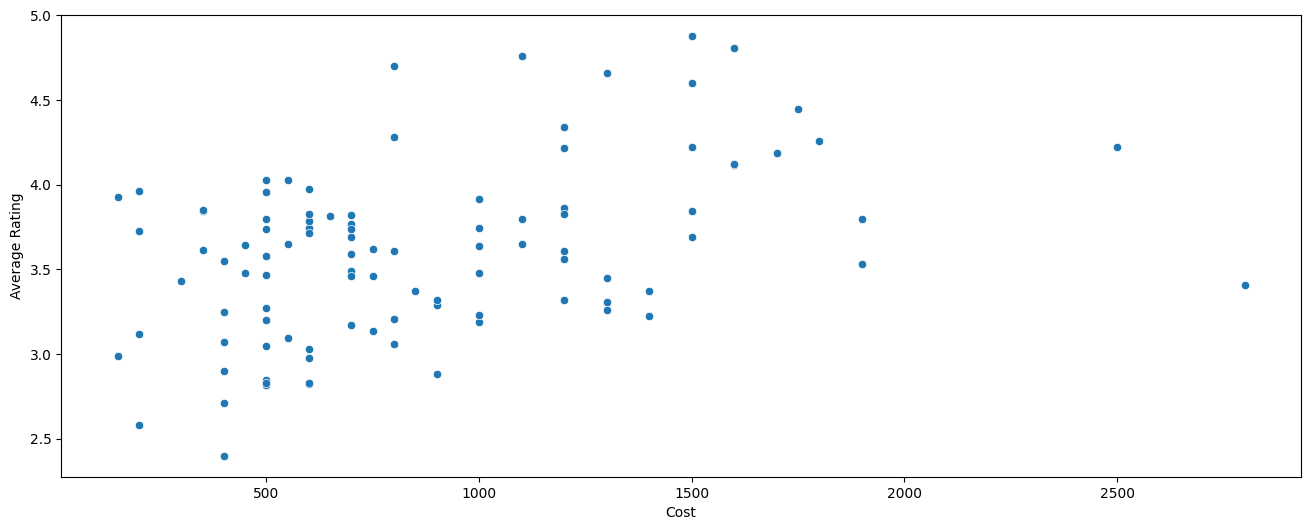

In [69]:
# generating a scatter plot to display the variation of ratings with respect to cost
plot_scatter_plot(cost_avg_rating_df, 'Cost', 'Average Rating')

It is observed that there is some linear relationship between the average rating of restaurants and the cost of food.

# Feature Engineering

In [71]:
# exploring the head of restaurant metadata
meta_work_df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800.0,"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300.0,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800.0,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200.0,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


Links and Timings are not useful in the clustering of restaurants. So, let's remove them from the restaurant metadata and create a new dataframe to be used for clustering.

In [72]:
# dropping Links and Timings from restaurant metadata to create clustering dataframe
clustering_df = meta_work_df.drop(['Links', 'Timings'], axis=1)

Average rating of each restaurant also needs to be considered for clustering. Average of ratings was already calculated during EDA. So, merge it to the clustering dataframe.

In [73]:
# merging average rating dataframe to clustering dataframe
clustering_df = clustering_df.merge(right=cost_avg_rating_df.loc[:, ['Restaurant', 'Average Rating']], left_on='Name', right_on='Restaurant')
clustering_df.drop('Restaurant', axis=1, inplace=True)
clustering_df = clustering_df.rename(columns={'Name':'Restaurant'})

Cuisines are stored in the format of a list. It is necessary to convert the list data to numerical data as algorithm works only on numbers. So, let's encode them using multilabel encoder since list is iterable.

In [74]:
# multilabel encoding of Cuisines
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(clustering_df['Cuisines'])
encoded_features = mlb.classes_
clustering_df[encoded_features] = mlb.transform(clustering_df['Cuisines'])
clustering_df.drop('Cuisines', axis=1, inplace=True)

Let's get the list of individual cuisines and check if any corrections are required.

In [75]:
# list of cuisines
cuisines = [cuisine for cuisine in clustering_df.columns if cuisine not in ('Restaurant', 'Cost', 'Average Rating')]
print(cuisines)

['American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']


There are no misspelled cuisines in the list. Let's further combine multiple cuisines to reduce the number of dimensions, so that better results can be obtained. 

In [76]:
# combining various cuisines
clustering_df['American'] = clustering_df['American'] + clustering_df['BBQ']
clustering_df['South Indian'] = clustering_df['Andhra'] + clustering_df['South Indian']
clustering_df['Arabian'] = clustering_df['Arabian'] + clustering_df['Kebab']
clustering_df['Oriental'] = clustering_df['Asian'] + clustering_df['Chinese'] + clustering_df['Indonesian'] + clustering_df['Japanese'] + clustering_df['Momos'] + clustering_df['Sushi'] + clustering_df['Thai']
clustering_df['Drinks'] = clustering_df['Beverages'] + clustering_df['Juices']
clustering_df['Fast Food'] = clustering_df['Fast Food'] + clustering_df['Burger'] + clustering_df['Wraps']
clustering_df['European'] = clustering_df['Continental'] + clustering_df['European'] + clustering_df['Italian'] + clustering_df['Mediterranean'] + clustering_df['Pizza'] + clustering_df['Spanish']
clustering_df['Desserts'] = clustering_df['Desserts'] + clustering_df['Ice Cream']
clustering_df['Mughlai'] = clustering_df['Mughlai'] + clustering_df['Hyderabadi']

# remove redundant cuisines
clustering_df.drop(['BBQ', 'Andhra', 'Kebab', 'Asian', 'Chinese', 'Indonesian', 'Japanese', 
                    'Momos', 'Sushi', 'Thai', 'Beverages', 'Juices', 'Burger', 'Wraps', 
                    'Continental', 'Italian', 'Mediterranean', 'Pizza', 'Spanish', 'Ice Cream', 'Hyderabadi'], axis=1, inplace=True)

# converting cuisine data to binary
cuisines = [cuisine for cuisine in clustering_df.columns if cuisine not in ('Restaurant', 'Cost', 'Average Rating')]
for index in range(clustering_df.shape[0]):
  for cuisine in cuisines:
    if clustering_df.loc[index, cuisine] > 0:
      clustering_df.loc[index, cuisine] = 1

In [77]:
# exploring the head of clustering dataframe
clustering_df.head(3)

,Restaurant,Cost,Average Rating,American,Arabian,Bakery,Biryani,Cafe,Desserts,European,...,Modern Indian,Mughlai,North Eastern,North Indian,Salad,Seafood,South Indian,Street Food,Oriental,Drinks
0,Beyond Flavours,800.0,4.28,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,Paradise,800.0,4.70,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,Flechazo,1300.0,4.66,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [78]:
# exploring the head of review dataset
review_work_df.head(3)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Tokenized_Review
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"{'Reviews': 1, 'Followers': 2}",2019-05-25 15:54:00,0,"[ambience, good, food, quite, good, saturday, ..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"{'Reviews': 3, 'Followers': 2}",2019-05-25 14:20:00,0,"[ambience, good, pleasant, evening, service, p..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"{'Reviews': 2, 'Followers': 3}",2019-05-24 22:54:00,0,"[must, try, great, food, great, ambience, thnx..."


Input text data and target sentiment data are the only features necessary for sentiment analysis. So, Tokenized_Review and Rating are retained from review dataset to create a new dataframe for sentiment analysis.

In [79]:
# creating dataframe for sentiment analysis with Tokenized_Review and 
# Rating from review dataset
sentiment_df = review_work_df.loc[:, ['Tokenized_Review', 'Rating']]

Since Rating is a continous numerical data, it needs to be converted to categorical data to use as that target feature for classification.

In [80]:
# defining a function to convert rating to sentiment category
def convert_to_sentiment(rating):
  """
  Function to convert rating to its corresponding sentiment
  """
  # negative review
  sentiment = 0
  if rating >= 3:
    # positive review
    sentiment = 1
    
  return sentiment

In [81]:
# converting rating to sentiment
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x : convert_to_sentiment(x))
sentiment_df.drop('Rating', axis=1, inplace=True)

The value of 1 represents positive review and 0 represents negative review.

In [82]:
# exploring the head of sentiment analysis dataframe
sentiment_df.head(3)

,Tokenized_Review,Sentiment
0,"[ambience, good, food, quite, good, saturday, ...",1
1,"[ambience, good, pleasant, evening, service, p...",1
2,"[must, try, great, food, great, ambience, thnx...",1


# Text Processing

## Wordclouds

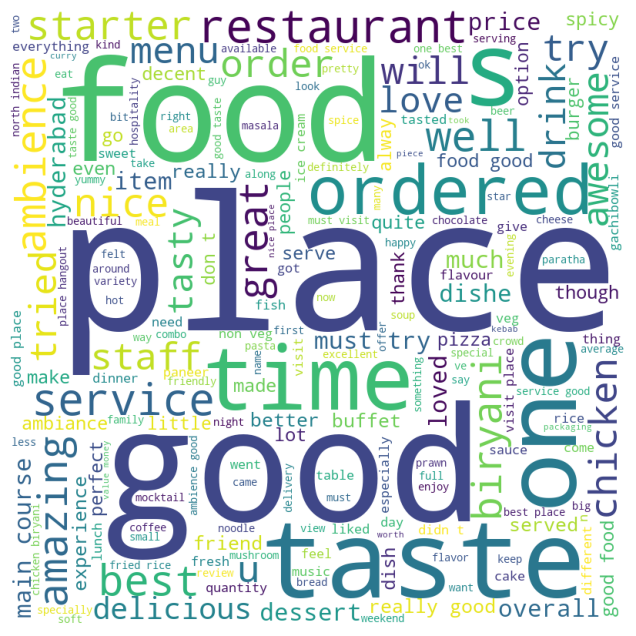

In [83]:
# generating wordcloud image of positive reviews
cloud_words = ''
for words in sentiment_df[sentiment_df['Sentiment'] == 1].Tokenized_Review:
  cloud_words += ' '.join(words)
generate_wordcloud(cloud_words)

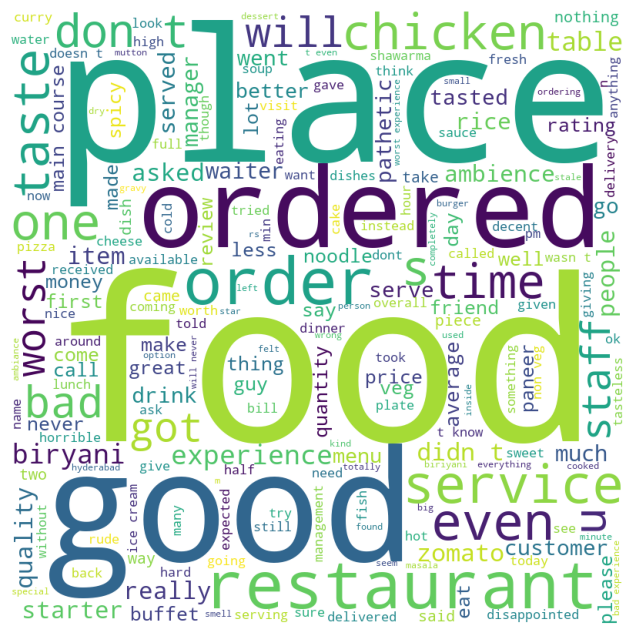

In [84]:
# generating wordcloud image of negative reviews
cloud_words = ''
for words in sentiment_df[sentiment_df['Sentiment'] == 0].Tokenized_Review:
  cloud_words += ' '.join(words)
generate_wordcloud(cloud_words)

## Text Normalization

Lemmatization is used for text normalization since meaning of words is more crucial than the getting base words to determine which class the text data belongs to.

In [85]:
# carrying out stemming
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

corpus = []
for review in sentiment_df.Tokenized_Review:
  corpus.append(' '.join([lemmatizer.lemmatize(word) for word in review]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iammi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Text Vectorization

TF-IDF is used for feature extraction from text since the importance of words also needs to be considered.

In [86]:
# carrying out TD-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpus_matrix = vectorizer.fit_transform(corpus)

In [87]:
# exporting text vectorizer

import pickle
pickle.dump(vectorizer, open('../models/text_vectorizer.pkl', 'wb'))

# Modelling

## Restaurant Clustering

### Based on Cuisines

#### Feature Scaling

Since the Euclidean distances between points are considered for K means and DBSCAN algorithm, let's perform feature scaling on important features.

In [ ]:
# importing library for scaling
from sklearn.preprocessing import MinMaxScaler

# scaling values in clustering dataframe
minmax_scaler = MinMaxScaler()
clustering_cuisine_scaled_df = minmax_scaler.fit_transform(clustering_df.drop(['Restaurant', 'Cost', 'Average Rating'], axis=1))

#### Principal Component Analysis

Since the clustering dataframe has a large number of features, let's perform dimensionality reduction using principal component analysis (PCA).

In [ ]:
# importing library for PCA
from sklearn.decomposition import PCA

# performing PCA with 3 principal components
pca = PCA(n_components=3)
clustering_cuisine_PCA_df = pca.fit_transform(clustering_cuisine_scaled_df)

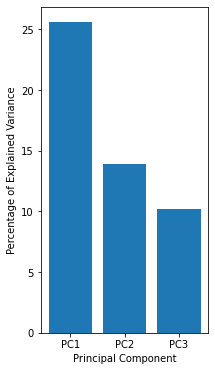


Cumulative variance contributed by the 3 principal components: 49.66%


In [ ]:
import numpy as np

# defining a function to plot scree plot of PCA
def plot_scree_plot(pca):
  """
  Function for plotting a scree plot of pca
  """
  per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

  labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
  plt.figure(figsize=(len(per_var), 6))
  plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
  plt.ylabel('Percentage of Explained Variance')
  plt.xlabel('Principal Component')
  plt.show()

# plotting a scree plot for PCA
plot_scree_plot(pca)

# cumulative variance contributed by the 3 principal components
cum_var = round(np.sum(pca.explained_variance_ratio_)*100, 2)
print(f"\nCumulative variance contributed by the 3 principal components: {cum_var}%")

It is observed that the cumulative variance contributed by the 3 principal components is close to 50%.

#### Model Training

Let's perform clustering using 2 different algorithms:
1. K Means
2. DBSCAN

and find out which one performs the best.

##### K Means Clustering

In [ ]:
# importing libraries
from sklearn.cluster import KMeans

Let's first use elbow method to determine the optimal number of clusters into which the data is to be clustered.

In [ ]:
# defining a function to fit the model and calculate SSE
def get_sse_of_trained_models(pca_data, min, max):
  """
  Function to calculate SSE
  """
  sse = {}
  for num in range(min, max+1):
    model_km = KMeans(n_clusters=num)
    model_km.fit(pca_data)
    sse[num] = model_km.inertia_

  return sse

# defining a function to plot elbow plot
def elbow_plot(pca_data, min, max):
  """
  Function to plot elbow plot
  """
  sse_dict = get_sse_of_trained_models(pca_data, min, max)
  k = list(sse_dict.keys())
  sse = list(sse_dict.values())

  plt.figure(figsize=(20, 6))
  sns.lineplot(k, sse)
  plt.xlabel('Number of clusters')
  plt.ylabel('SSE')

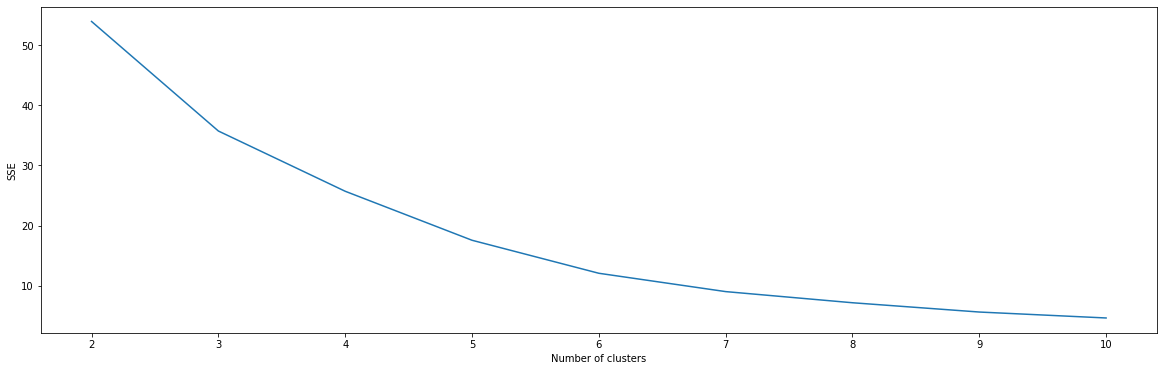

In [ ]:
# plotting elbow plot for K means algorithm 
# with number of clusters ranging from 2 to 10
elbow_plot(clustering_cuisine_PCA_df, 2, 10)

It is very difficult to find an exact elbow point. So let's employ silhouette coefficient analysis to find the optimal number of clusters.

In [ ]:
# importing library for silhouette coefficient analysis
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# defining a function for plotting silhouette samples
def plot_silhouette_samples(pca_data, n_clusters, cluster_labels):
  """
  Function to plot silhouette samples
  """
  if n_clusters > 1:
    # creating a figure
    plt.figure(figsize=(12, 6))

    # calculating the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)
    # silhouette_score gives the average value for all the samples.
    silhouette_avg = round(silhouette_score(pca_data, cluster_labels), 4)
    
    y_lower = 10
    for i in range(n_clusters):
      # aggregating the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # labelling the silhouette plots with their cluster numbers at the middle
      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # calculating the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
                fontsize=14, fontweight='bold')
    plt.title(f"The average silhouette_score is: {silhouette_avg}")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clearing the yaxis labels / ticks
    plt.yticks([])  
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# defining a function for silhouette coefficient analysis for K means algorithm
def silhouette_coefficient_analysis_km(pca_data, min, max):
  """
  Function for silhouette coefficient analysis for k means algorithm
  """
  for n_clusters in range(min, max+1):
    # Initializing the clusterer with n_clusters
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(pca_data)

    # plotting silhouette samples
    plot_silhouette_samples(pca_data, n_clusters, cluster_labels)

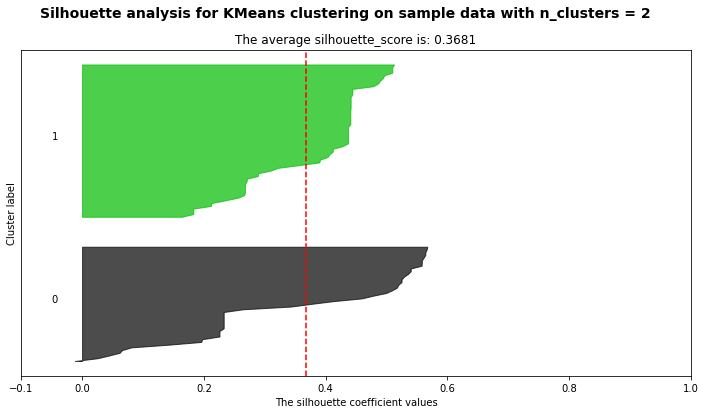

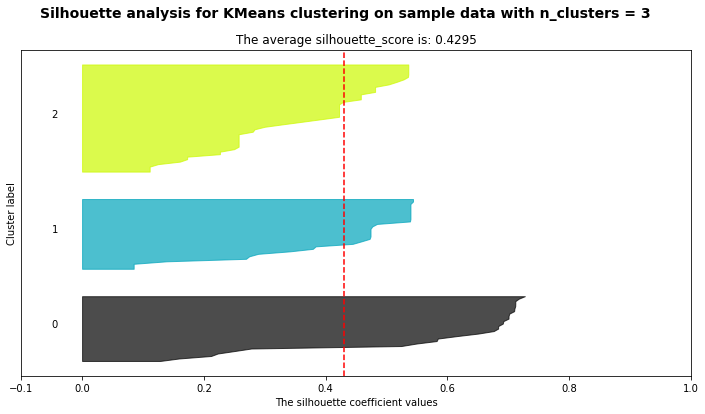

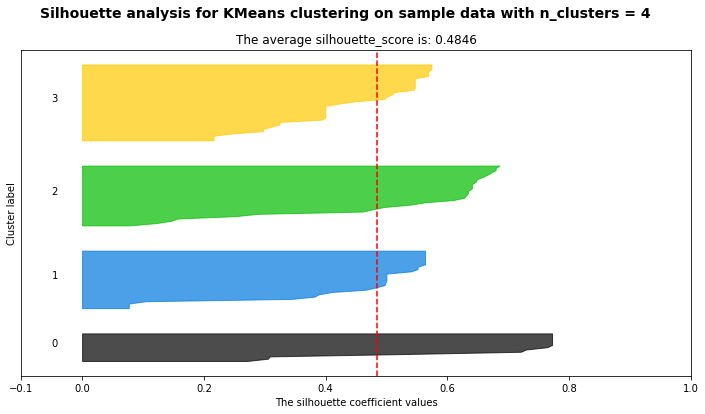

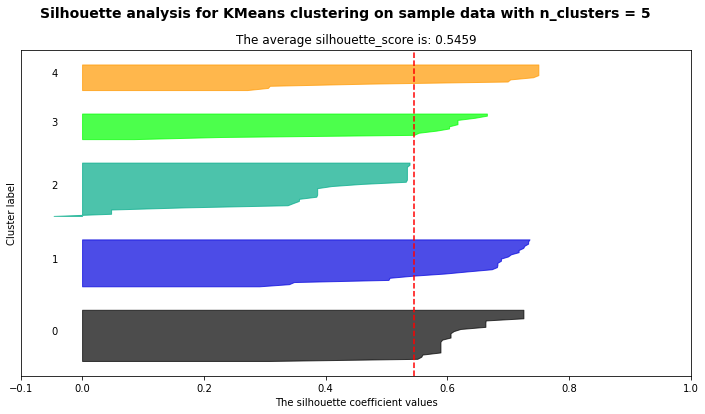

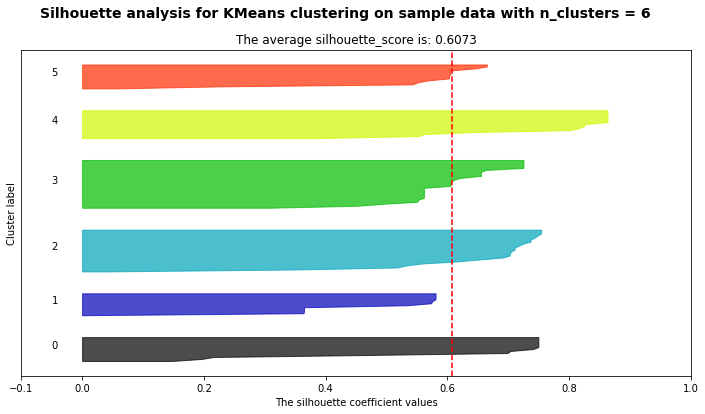

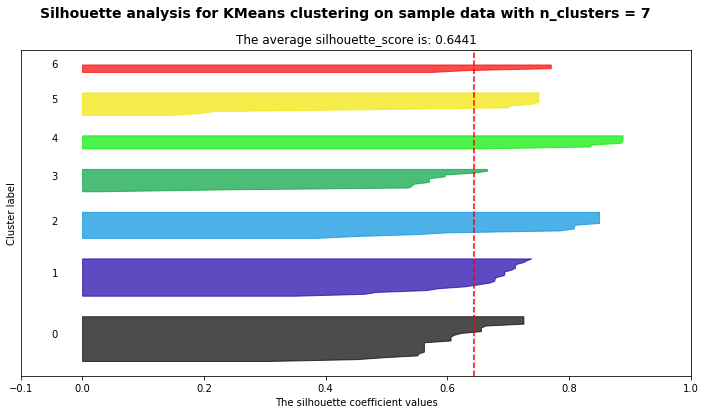

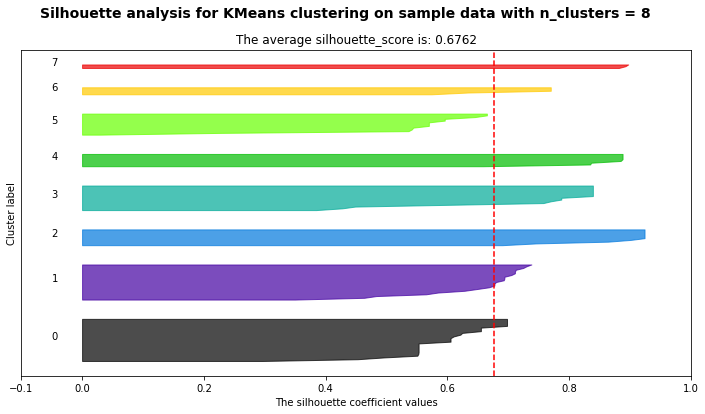

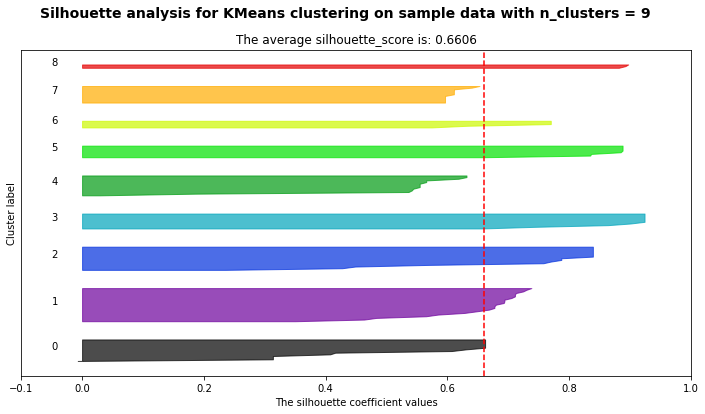

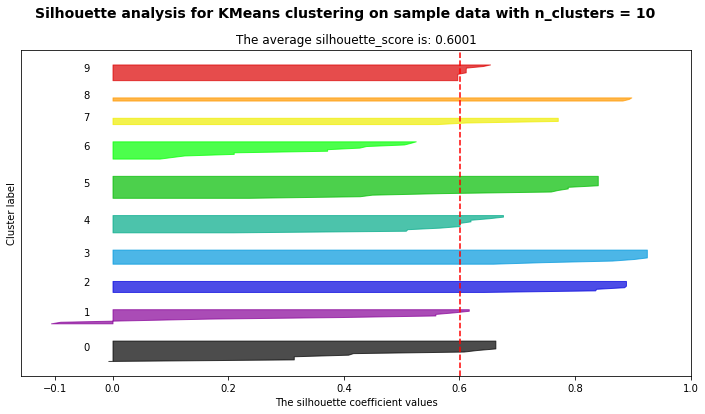

In [ ]:
# performing silhouette coefficient analysis with number of clusters ranging from 2 to 10
silhouette_coefficient_analysis_km(clustering_cuisine_PCA_df, 2, 10)

It is observed that number of clusters = 8 has highest silhouette score and also doesn't have negative silhouette score in any of the clusters. So 8 is selected as the number of clusters. Now let's train the model.

In [ ]:
# defining the model
model_km = KMeans(n_clusters=8)

# fitting the model
model_km.fit(clustering_cuisine_PCA_df)

# cluster prediction
cluster_label = model_km.predict(clustering_cuisine_PCA_df)

# adding cluster label to the clustering dataframe
clustering_cuisine_km_df = clustering_df.copy()
clustering_cuisine_km_df['Cluster'] = cluster_label

# adding cluster label to the PCA dataframe
clustering_cuisine_PCA_km_df = pd.DataFrame(clustering_cuisine_PCA_df, columns=['PC1', 'PC2', 'PC3'], index=clustering_df.index)
clustering_cuisine_PCA_km_df['Cluster'] = cluster_label

In [ ]:
# exploring the head of the clustering dataframe
clustering_cuisine_km_df.head(3)

,Restaurant,Cost,Average Rating,American,Arabian,Bakery,Biryani,Cafe,Desserts,European,...,Mughlai,North Eastern,North Indian,Salad,Seafood,South Indian,Street Food,Oriental,Drinks,Cluster
0,Beyond Flavours,800.0,4.28,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,Paradise,800.0,4.70,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2
2,Flechazo,1300.0,4.66,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
# exploring the head of the PCA dataframe
clustering_cuisine_PCA_km_df.head(3)

,PC1,PC2,PC3,Cluster
0,-0.914259,-0.512735,0.239648,0
1,-0.651818,0.659396,-0.071095,2
2,-0.399690,-0.575207,-0.221660,0


Let's generate the PCA plot for the model.

In [ ]:
# defining a function to create a 3-dimensional PCA plot
def PCA_plot(pca_df):
  fig = plt.figure(figsize=(6, 6))
  ax = fig.add_subplot(projection='3d')
  colors = ['red', 'green', 'cyan', 'orange', 'blue', 'yellow', 'violet', 'lime', 'pink']
  for i in range(8):
    ax.scatter(pca_df.PC1[pca_df['Cluster'] == i], 
               pca_df.PC2[pca_df['Cluster'] == i], 
               pca_df.PC3[pca_df['Cluster'] == i], c=colors[i], s=60)
  ax.view_init(20, 200)
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  ax.set_zlabel('PC3')

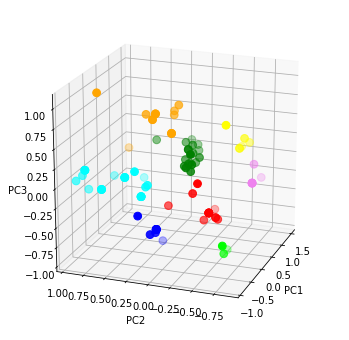

In [ ]:
# creating a 3D PCA plot
PCA_plot(clustering_cuisine_PCA_km_df)

Let's check the top cuisines in each cluster to analyze the clusters.

In [ ]:
# defining a function to display top cuisines in each cluster
def top_cuisines(clustering_df):
  """
  Function to display top cuisines in each cluster
  """
  num_clusters = clustering_df['Cluster'].max() + 1

  for num in range(num_clusters):
    cluster_df = clustering_df[clustering_df['Cluster'] == num].reset_index()
    cluster_df = cluster_df.drop(['Restaurant', 'Cost', 'Average Rating', 'Cluster', 'index'], axis=1)
    cluster_df = cluster_df.sum().reset_index().rename(columns={'index':'Cuisine', 0:'count'}).sort_values('count', ascending=False)
    top_count = list(cluster_df['count'].unique())[2]
    plot_vertical_bar_graph(cluster_df[(cluster_df['count'] >= top_count) & (cluster_df['count'] > 1)], 'Cuisine', 'count', f"Cluster: {num}")

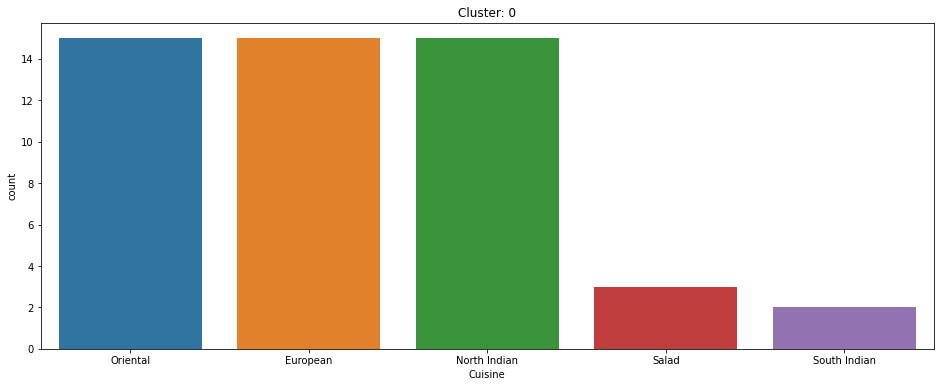

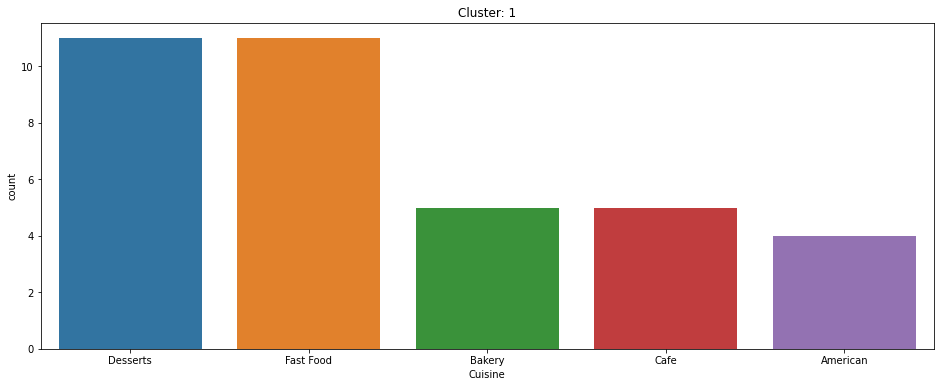

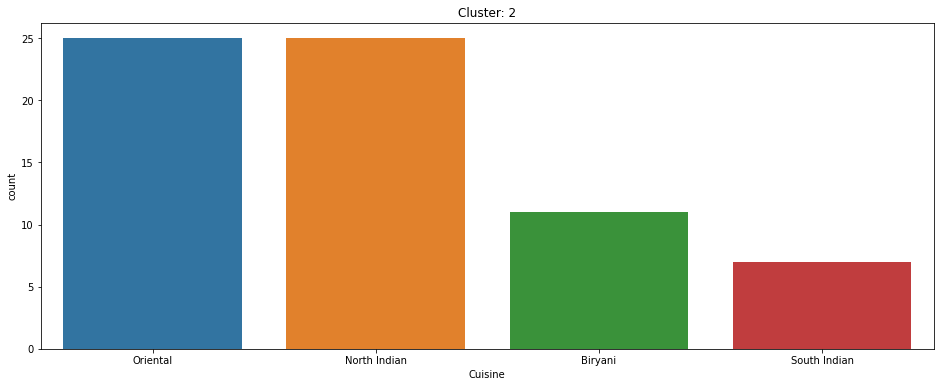

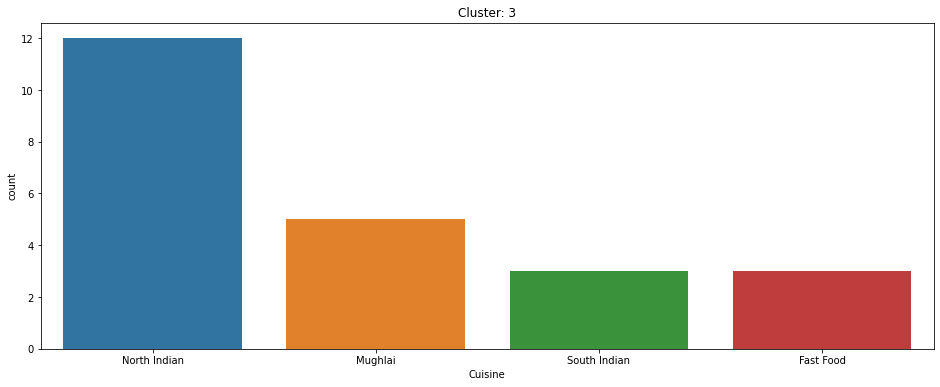

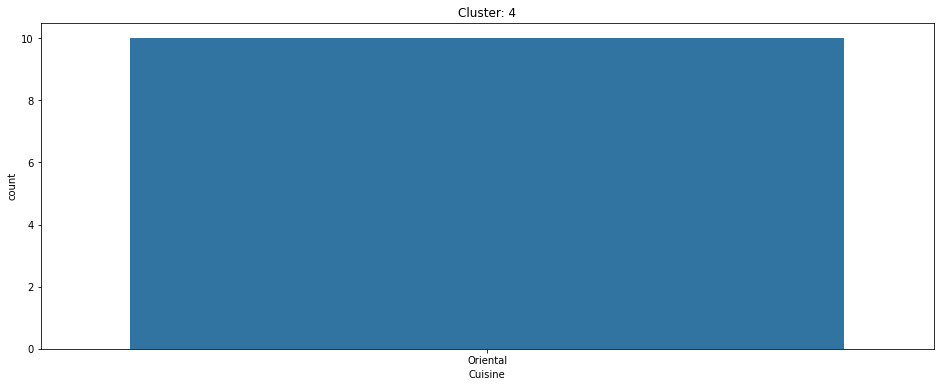

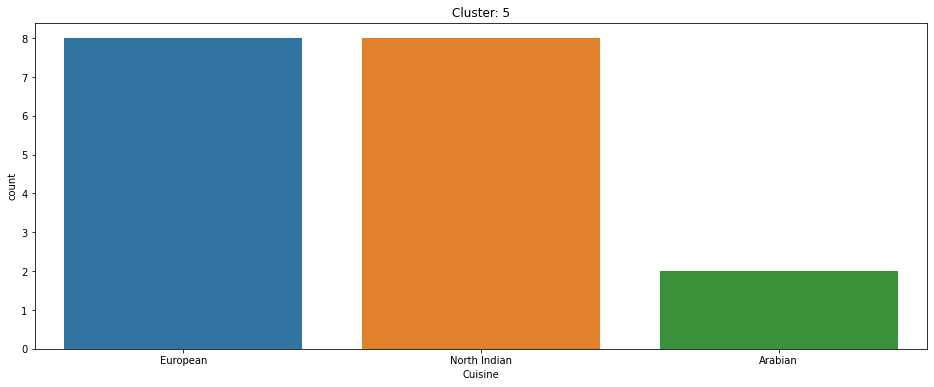

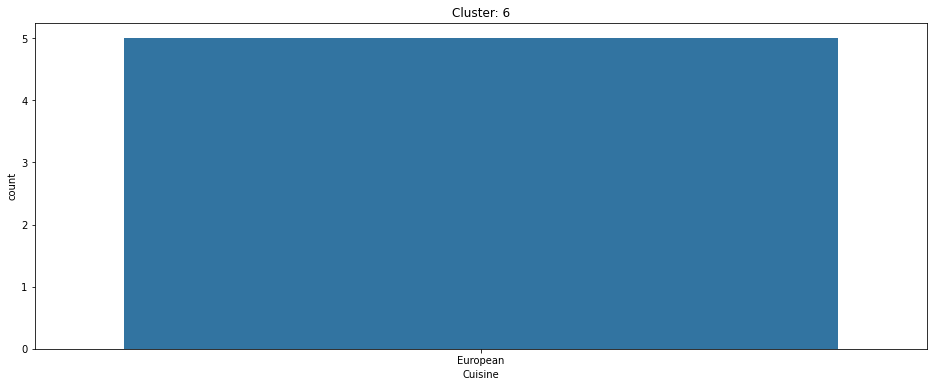

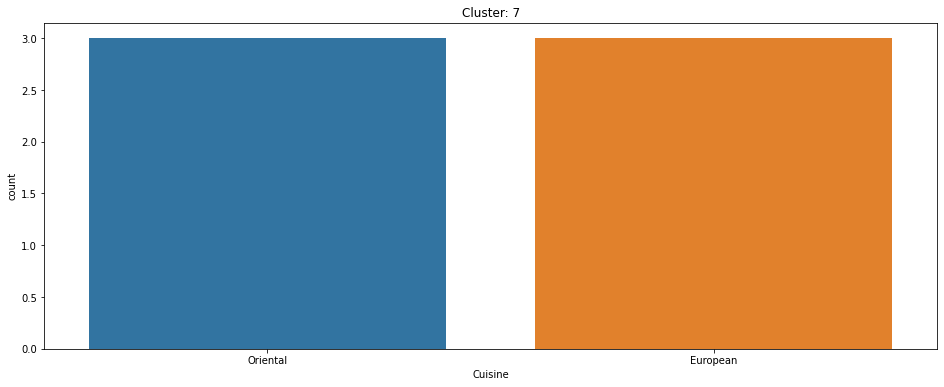

In [ ]:
# top cuisines in each cluster
top_cuisines(clustering_cuisine_km_df)

1. Cluster 0: Seems like multicuisine restaurants.
2. Cluster 1: Dominated by cuisines which are served and consumed quickly.
3. Cluster 2: Dominated by cuisines which are found to be most popular during EDA.
4. Cluster 3: Dominated by cuisines commonly eaten in North India.
5. Cluster 4: Dominated by Oriental cuisine.
6. Cluster 5: Seems like multicuisine restaurants.
7. Cluster 6: Dominated by European cuisine.
8. Cluster 7: Seems like multicuisine restaurants.

##### DBSCAN Clustering

In [ ]:
# importing libraries
from sklearn.cluster import DBSCAN

# defining the model
model_dbscan = DBSCAN(eps=0.4, min_samples=4)

# fitting the model
model_dbscan.fit(clustering_cuisine_PCA_df)

# cluster prediction
cluster_label = model_dbscan.labels_

# adding cluster label to the clustering dataframe
clustering_cuisine_dbscan_df = clustering_df.copy()
clustering_cuisine_dbscan_df['Cluster'] = cluster_label

# adding cluster label to the PCA dataframe
clustering_cuisine_PCA_dbscan_df = pd.DataFrame(clustering_cuisine_PCA_df, columns=['PC1', 'PC2', 'PC3'], index=clustering_df.index)
clustering_cuisine_PCA_dbscan_df['Cluster'] = cluster_label

In [ ]:
# exploring the head of the clustering dataframe
clustering_cuisine_dbscan_df.head(3)

,Restaurant,Cost,Average Rating,American,Arabian,Bakery,Biryani,Cafe,Desserts,European,...,Mughlai,North Eastern,North Indian,Salad,Seafood,South Indian,Street Food,Oriental,Drinks,Cluster
0,Beyond Flavours,800.0,4.28,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
1,Paradise,800.0,4.70,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,Flechazo,1300.0,4.66,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
# exploring the head of the PCA dataframe
clustering_cuisine_PCA_dbscan_df.head(3)

,PC1,PC2,PC3,Cluster
0,-0.914259,-0.512735,0.239648,1
1,-0.651818,0.659396,-0.071095,0
2,-0.399690,-0.575207,-0.221660,1


Let's generate the PCA plot for the model.

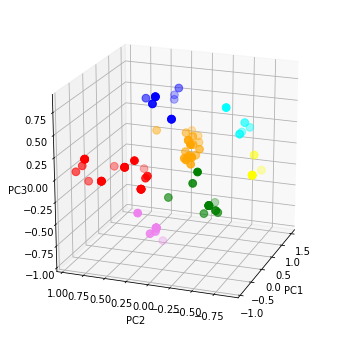

In [ ]:
# creating a 3D PCA plot
PCA_plot(clustering_cuisine_PCA_dbscan_df)

Let's check the top cuisines in each cluster to analyze the clusters.

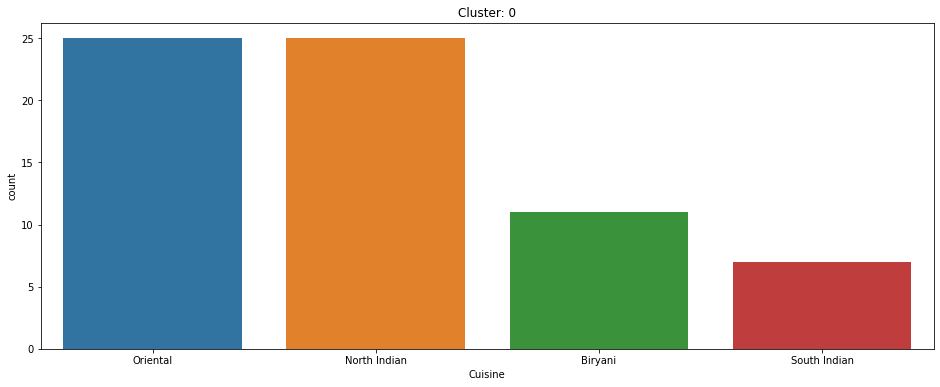

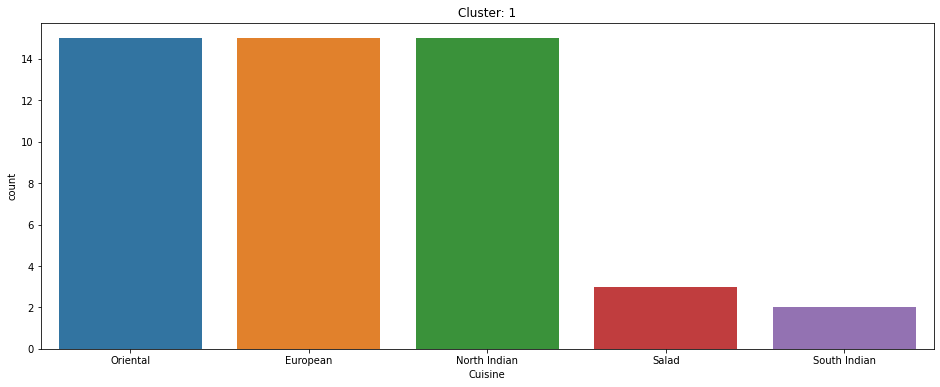

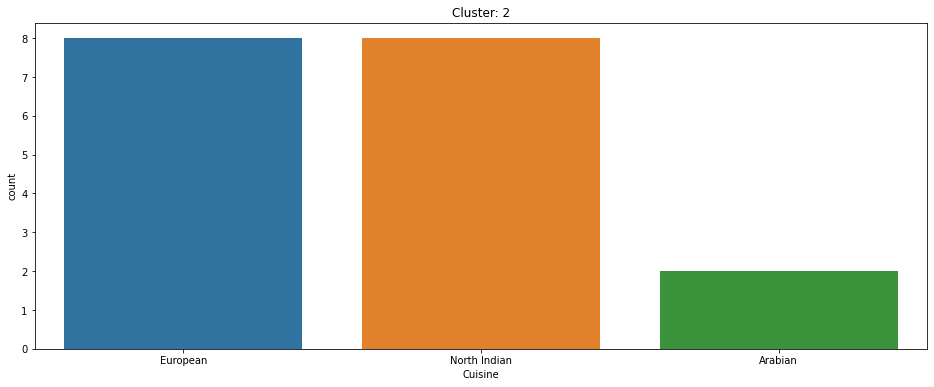

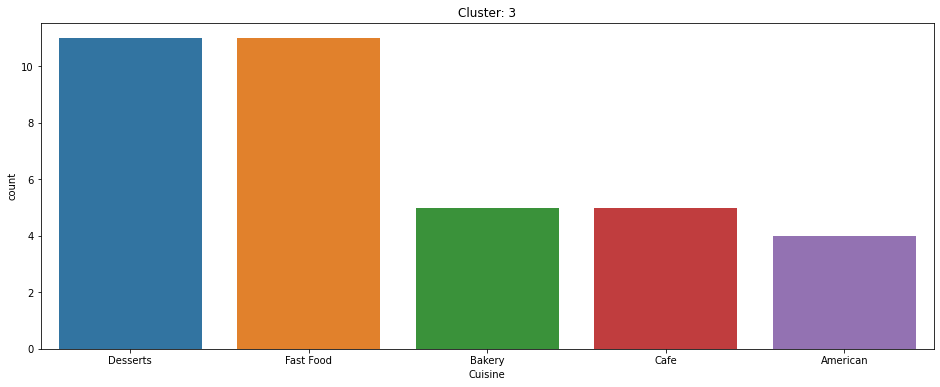

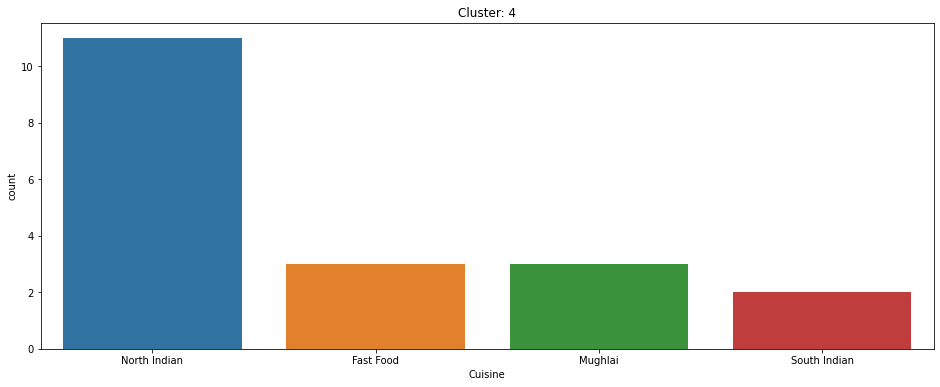

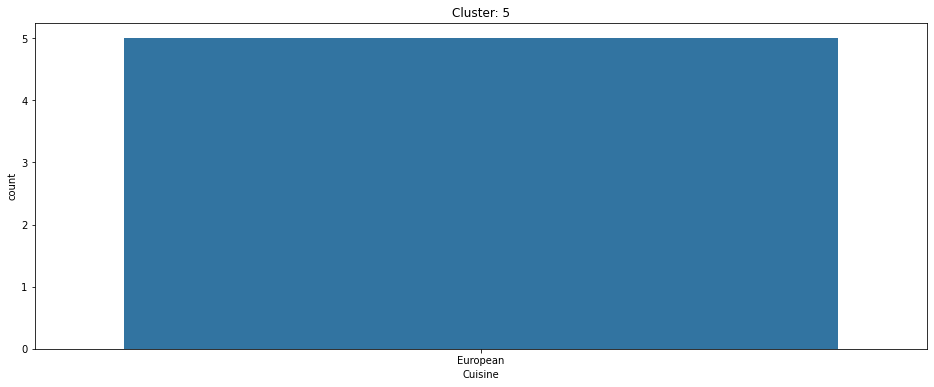

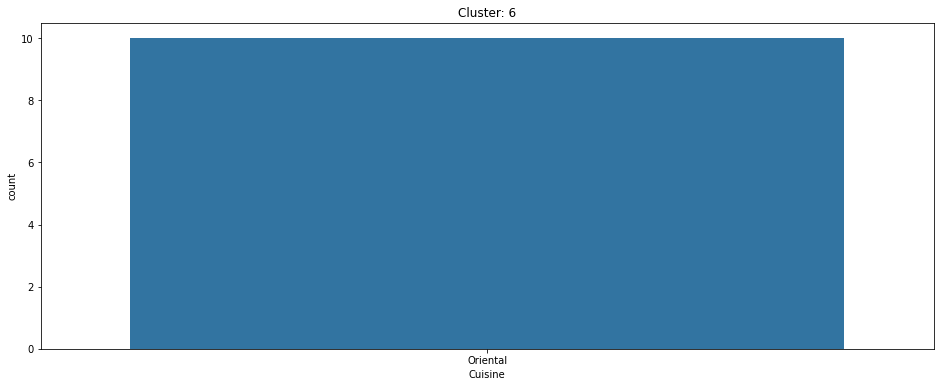

In [ ]:
# top cuisines in each cluster
top_cuisines(clustering_cuisine_dbscan_df)

1. Cluster 0: Dominated by cuisines which are found to be most popular during EDA.
2. Cluster 1: Seems like multicuisine restaurants.
3. Cluster 2: Seems like multicuisine restaurants.
4. Cluster 3: Dominated by cuisines which are served and consumed quickly.
5. Cluster 4: Dominated by cuisines commonly eaten in North India.
6. Cluster 5: Dominated by European cuisine.
7. Cluster 6: Dominated by Oriental cuisine.

#### Model Comparison

Let's use silhouette coefficient to compare the two clustering models find the out the best among them. Higher the silhouette score, better the model.

In [ ]:
# list of models
models = [{'Model':'K Means', 'Clusters':clustering_cuisine_km_df['Cluster']},
          {'Model':'DBSCAN', 'Clusters':clustering_cuisine_dbscan_df['Cluster']}]

# calculating the silhouette score of models
for model in models:
  print(f"{model['Model']}: {round(silhouette_score(clustering_cuisine_PCA_df, model['Clusters']), 6)}")

K Means: 0.676246
DBSCAN: 0.646559


Both the models clustered the restaurants based on cuisines similarly, except for 1 missing repeated cluster in the K means model. The model built using K means clustering algorithm has higher silhouette coefficient than that built using DBSCAN algorithm by only 4.6%. So either of them can be chosen for clustering the restaurant dataset based on cuisines, depending on the number of clusters preferred and whether or not outliers be included.

### Based on Cost and Rating

#### Feature Scaling

Since the Euclidean distances between points are considered for K means and DBSCAN algorithm, let's perform feature scaling on important features.

In [ ]:
# scaling values in clustering dataframe
clustering_cost_rating_scaled_df = minmax_scaler.fit_transform(clustering_df.loc[:, ['Cost', 'Average Rating']])

#### Model Training

Since there are only two features under consideration for clustering, PCA is not necessary. Let's perform clustering using 2 different algorithms:
1. K Means
2. DBSCAN

and find out which one performs the best.

##### K Means Clustering

Let's first use elbow method to determine the optimal number of clusters into which the data is to be clustered.

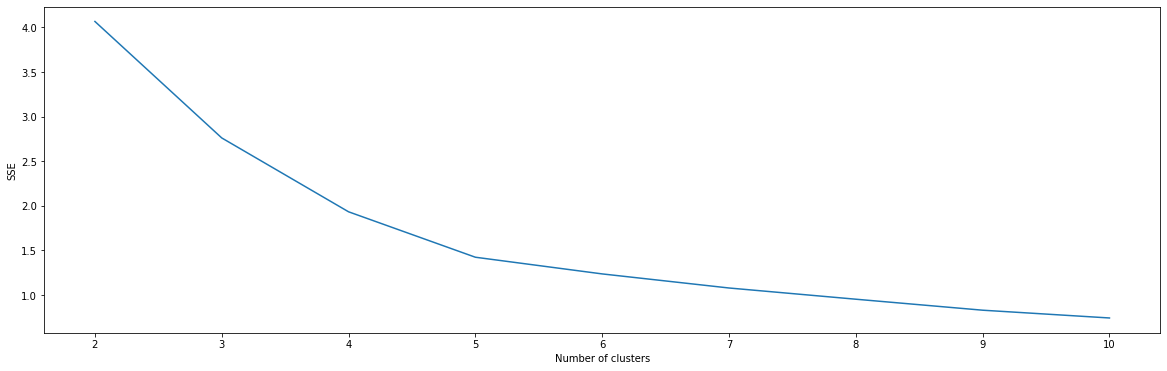

In [ ]:
# plotting elbow plot for K means algorithm 
# with number of clusters ranging from 2 to 10
elbow_plot(clustering_cost_rating_scaled_df, 2, 10)

The elbow point is found to be at number of clusters = 5. So let's select 5 as the number of clusters.

In [ ]:
# defining the model
model_km = KMeans(n_clusters=5)

# fitting the model
model_km.fit(clustering_cost_rating_scaled_df)

# cluster prediction
cost_rating_label = model_km.predict(clustering_cost_rating_scaled_df)

# adding cluster label to the clustering dataframe
clustering_cost_rating_km_df = clustering_df.copy()
clustering_cost_rating_km_df['Cluster'] = cost_rating_label

In [ ]:
# exploring the head of the clustering dataframe
clustering_cost_rating_km_df.head(3)

,Restaurant,Cost,Average Rating,American,Arabian,Bakery,Biryani,Cafe,Desserts,European,...,Mughlai,North Eastern,North Indian,Salad,Seafood,South Indian,Street Food,Oriental,Drinks,Cluster
0,Beyond Flavours,800.0,4.28,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,Paradise,800.0,4.70,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,Flechazo,1300.0,4.66,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1


Let's generate a scatter plot of the clusters to analyze the clusters.

In [ ]:
# defining a function to generate a scatter plot of the clusters
def plot_clusters(clustering_df):
  """
  Function to generate a scatter plot of the clusters
  """
  plt.figure(figsize=(12, 8))
  sns.scatterplot(y='Average Rating', x='Cost', data=clustering_df, hue='Cluster', palette = 'tab10', s=60)
  plt.show()

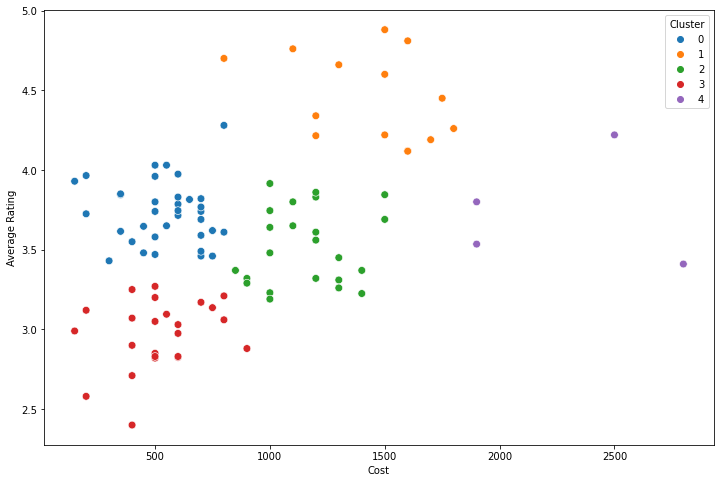

In [ ]:
# generating a scatter plot of the clusters
plot_clusters(clustering_cost_rating_km_df)

1. Cluster 0: Affordable and average-rated restaurants.
2. Cluster 1: Medium-priced and high-rated restaurants.
3. Cluster 2: Medium-priced and average-rated restaurants.
4. Cluster 3: Affordable and low-rated restaurants.
5. Cluster 4: Expensive restaurants.

##### DBSCAN Clustering

In [ ]:
# defining the model
model_dbscan = DBSCAN(eps=0.1, min_samples=3)

# fitting the model
model_dbscan.fit(clustering_cost_rating_scaled_df)

# cluster prediction
cost_rating_label = model_dbscan.labels_

# adding cluster label to the clustering dataframe
clustering_cost_rating_dbscan_df = clustering_df.copy()
clustering_cost_rating_dbscan_df['Cluster'] = cost_rating_label

In [ ]:
# exploring the head of the clustering dataframe
clustering_cost_rating_dbscan_df.head(3)

,Restaurant,Cost,Average Rating,American,Arabian,Bakery,Biryani,Cafe,Desserts,European,...,Mughlai,North Eastern,North Indian,Salad,Seafood,South Indian,Street Food,Oriental,Drinks,Cluster
0,Beyond Flavours,800.0,4.28,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,-1
1,Paradise,800.0,4.70,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,-1
2,Flechazo,1300.0,4.66,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0


Let's generate a scatter plot of the clusters to analyze the clusters.

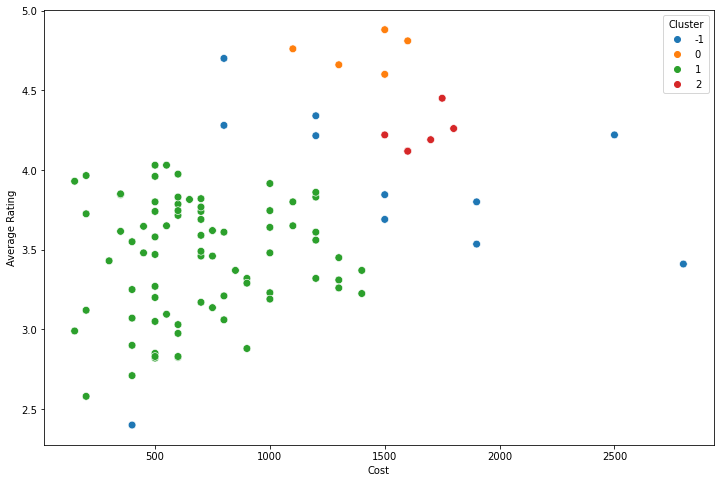

In [ ]:
# generating a scatter plot of the clusters
plot_clusters(clustering_cost_rating_dbscan_df)

1. Cluster 0: Medium-priced and high-rated restaurants.
2. Cluster 1: Low and medium budget restaurants.
3. Cluster 2: Medium-priced and abpve average-rated restaurants.

There are some outliers as well, especially the expensive restaurants.

#### Model Comparison

Let's use silhouette coefficient to compare the two clustering models find the out the best among them. Higher the silhouette score, better the model.

In [ ]:
# list of models
models = [{'Model':'K Means', 'Clusters':clustering_cost_rating_km_df['Cluster']},
          {'Model':'DBSCAN', 'Clusters':clustering_cost_rating_dbscan_df['Cluster']}]

# calculating the silhouette score of models
for model in models:
  print(f"{model['Model']}: {round(silhouette_score(clustering_cost_rating_scaled_df, model['Clusters']), 6)}")

K Means: 0.461043
DBSCAN: 0.392883


The K means algorithm was more successful than DBSCAN algorithm in creating accurate and distinguishable clusters and also the model built using K means  algorithm has higher silhouette coefficient than that built using DBSCAN algorithm by 18%. So the model built using K means algorithm can be chosen for clustering based on cost and ratings.

## Sentiment Analysis

### Train-Test Split

In [88]:
# independant feature
X = corpus_matrix

# dependant feature
y = sentiment_df['Sentiment']

In [89]:
# spliting the datasets to training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7466, 13267)
(7466,)
(2489, 13267)
(2489,)


### Feature Scaling

Scaling of features is important because algorithms like logistic regression, which is based on gradient descent, performs better when features are relatively on a similar scale. 

So training and test data of independant features are scaled using standardization.

In [90]:
# standardization of independant training and testing data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler(with_mean=False)
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

### Handling Data Imbalance

Let's check if the dataset is imbalanced using a count plot.

In [91]:
# defining a function to generate a count plot
def generate_count_plot(data):
  """
  Function to generate a count plot
  """
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  fig, ax = plt.subplots()
  data.value_counts().plot(ax=ax, kind='bar')
  plt.show()

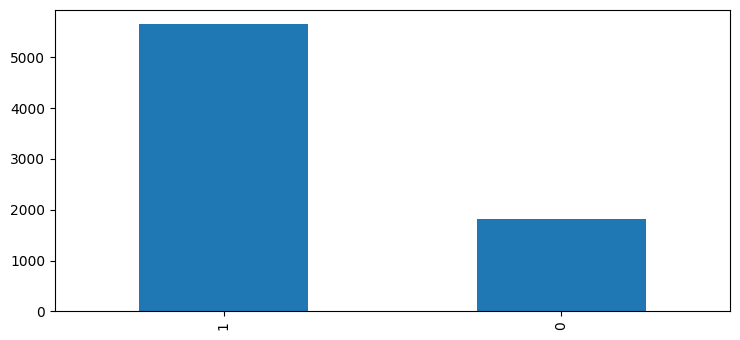

In [92]:
# generating a count plot to check data imbalance 
generate_count_plot(y_train)

The dataset is moderately imbalanced. If we train the models without fixing this problem, the model will be completely biased. So, we will use an over sampling method called SMOTE to balance the dataset. Undersampling was not employed as the dataset is already small and undersampling will lead to loss of information.

In [93]:
# oversampling to eliminate data imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

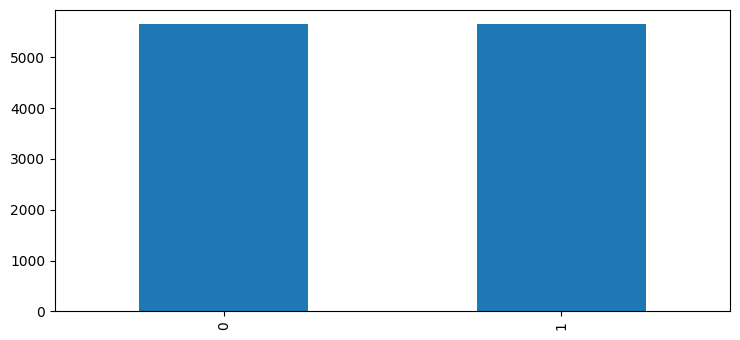

In [94]:
# generating a count plot to check data imbalance 
generate_count_plot(y_train)

### Model Training

Let's train the dataset with 4 different algorithms, namely 
1. Logistic Regression
2. Random Forest
3. Naive Bayes
4. Support Vector Machine

and find out which one performs the best.

In [95]:
# importing libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# defining a function for model evaluation
def model_evaluation(model, y_test, y_test_pred):
  """
  Function for calculating and print model evaluation metrics
  """
  # calculate model metrics
  accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 6)
  precision = round(precision_score(y_test, y_test_pred, average='weighted') * 100, 6)
  recall = round(recall_score(y_test, y_test_pred, average='weighted') * 100, 6)
  f1Score = round(f1_score(y_test, y_test_pred, average='weighted') * 100, 6)

  # # print model metrics
  # print(f"{model}")
  # print("****************************")
  # print(f"Accuracy  : {accuracy} %")
  # print(f"Precision : {precision} %")
  # print(f"Recall    : {recall} %")
  # print(f"F1 Score  : {f1Score} %")
  # print("\n")

  # return model evaluation
  return {'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1_Score':f1Score}

# defining a function to plot the confusion matrix of a model
def plot_confusion_matrix(y_test, y_test_pred, title=''):
  """
  Function for plotting the confusion matrix of a model
  """
  fig = plt.figure(figsize=(4,4))
  cf_matrix = confusion_matrix(y_test_pred, y_test)
  sns.heatmap(cf_matrix, annot=True, cmap='Blues').set_title(title)
  plt.show()

# create a dataframe to store metrics related to models
metrics_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1Score'])

In [96]:
# defining a function for training model
def train_model(model_name, model):
  """
  Function for training model
  """
  # Fitting the training dataset to the model
  model.fit(X_train, y_train)

  # predicting test data
  y_test_pred = model.predict(X_test)

  # model evaluation
  evaluation = model_evaluation(model_name, y_test, y_test_pred)

  # plot confusion matrix of model
  plot_confusion_matrix(y_test, y_test_pred, title=model_name)

  # add metrics to metrics table
  metrics_table.loc[len(metrics_table.index)] = [model_name, evaluation['Accuracy'], evaluation['Precision'], 
                                                 evaluation['Recall'], evaluation['F1_Score']] 

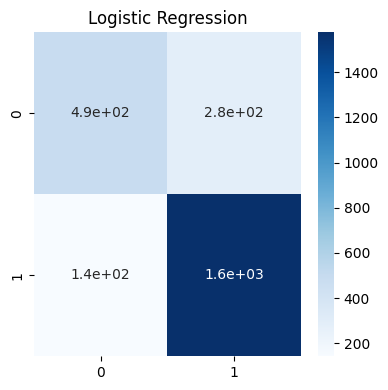

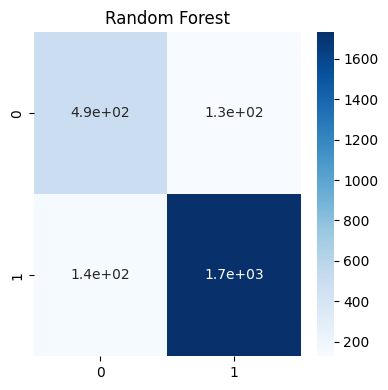

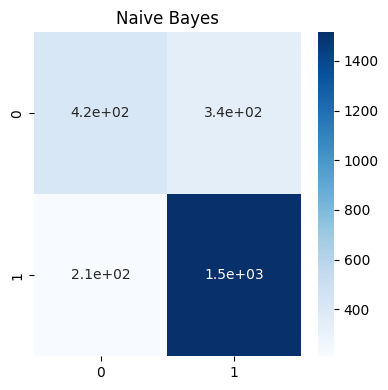

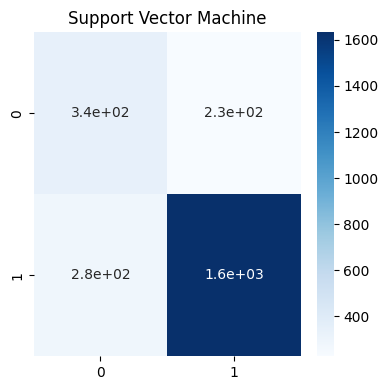

In [97]:
# importing libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# list of models
list_of_models = [{'Name':'Logistic Regression', 'Model':LogisticRegression()}, 
                  {'Name':'Random Forest', 'Model':RandomForestClassifier()}, 
                  {'Name':'Naive Bayes', 'Model':MultinomialNB()}, 
                  {'Name':'Support Vector Machine', 'Model':SVC()}]

for model in list_of_models:
  train_model(model['Name'], model['Model'])

### Model Comparison

In [98]:
# print metrics table
metrics_table

,Model,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,82.884693,84.484059,82.884693,83.405614
1,Random Forest,89.192447,89.113662,89.192447,89.149055
2,Naive Bayes,77.701888,79.457787,77.701888,78.352752
3,Support Vector Machine,79.469667,78.883685,79.469667,79.125734


Let's use F1 Score for comparing different models, since the dataset is imbalanced, and find out which one is better. Higher the F1 Score, better the model.

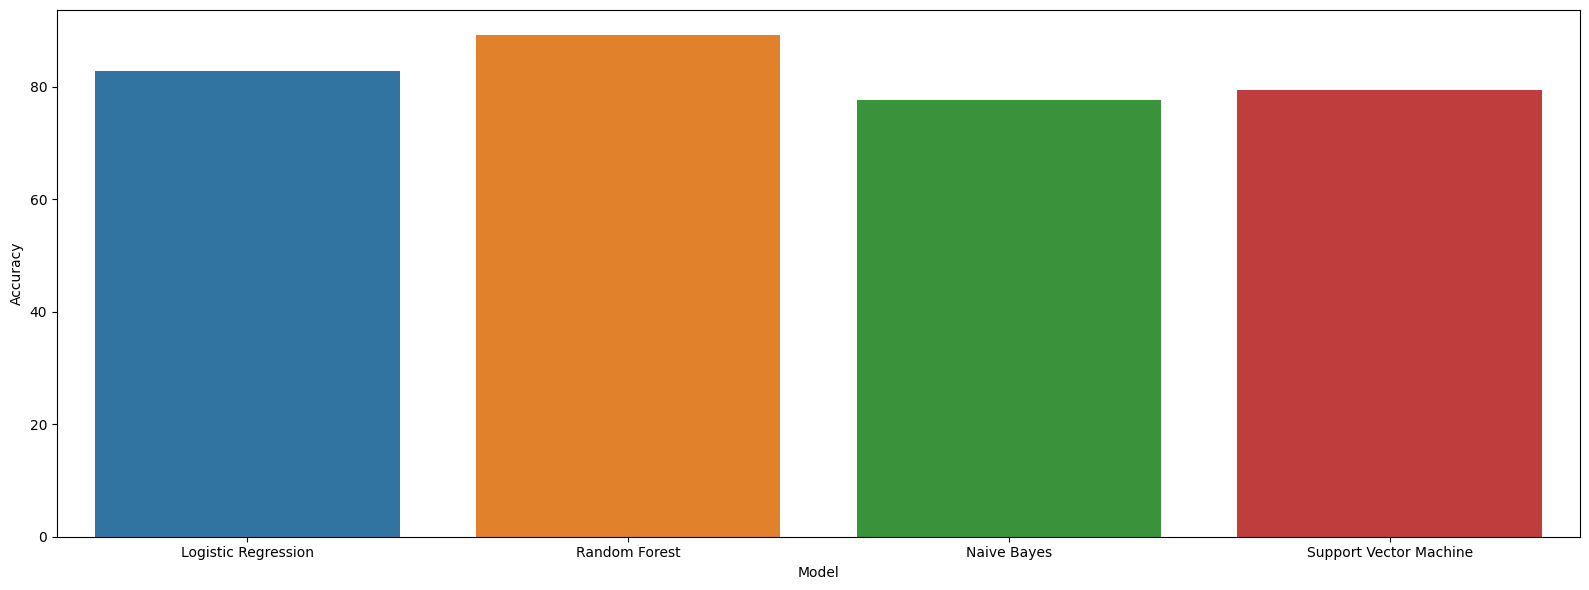

In [99]:
# plotting a vertical bar graph to display the F1 scores
plot_vertical_bar_graph(metrics_table, 'Model', 'Accuracy')

The model built using the random forest algorithm has the highest F1 Score.
So, it can be used for sentiment analysis after performing hyperparameter tuning.

### Hyperparameter Tuning

In [100]:
# importing library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# defining parameter grid for hyperparameters tuning
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              'max_features': ['auto', 'sqrt', 'log2']}

# hyperparameter tuning
model = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5, n_iter=10)

# Fit dataset to model
model.fit(X_train, y_train)

# Model prediction
y_test_pred = model.predict(X_test)

In [101]:
# print best parameter values and accuracy
print("The best parameters: ")
for key, value in model.best_params_.items():
  print(f"{key}={value}")
print(f"\nBest F1 Score: {round(model.best_score_*100, 4)}%")

The best parameters: 
min_samples_split=10
min_samples_leaf=1
max_leaf_nodes=100
max_features=sqrt
max_depth=None

Best F1 Score: 89.565%


In [102]:
comparison_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
comparison_Dataframe

,actual,pred
0,1,1
1,0,1
2,0,0
3,1,1
4,1,1
...,...,...
2484,1,1
2485,1,1
2486,1,1
2487,1,1


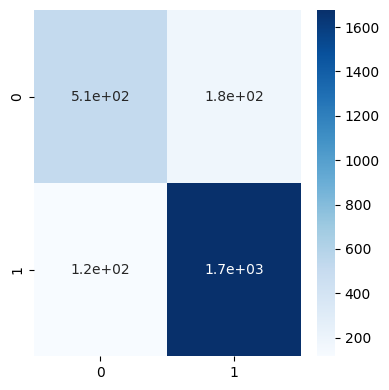

In [103]:
# plotting the confusion matrix of the model
plot_confusion_matrix(y_test, y_test_pred)

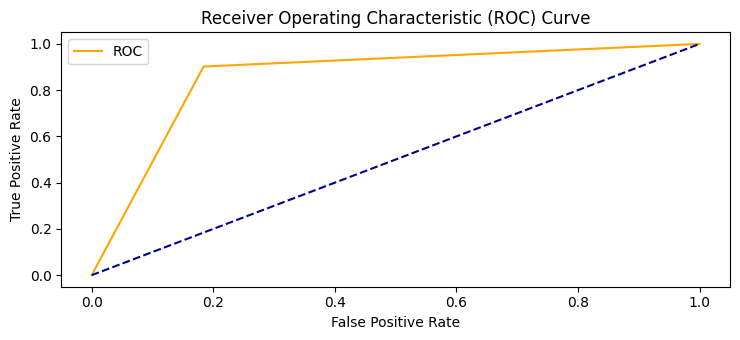

In [104]:
# defining a function to plot the ROC curve of a model
def plot_roc_curve(y_test, y_test_pred):
  """
  Function for plotting the ROC curve of a model
  """
  fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

# plotting the ROC curve of the model
plot_roc_curve(y_test, y_test_pred)

In [105]:
# exporting model
pickle.dump(model, open('../models/sentiment_model.pkl', 'wb'))

# Conclusion

### Conclusions from EDA

1.	Mondays Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant and Mohammedia Shawarma, and Amul are the most affordable ones.
2.	North Indian cuisine is the most popular cuisine.
3.	Anvesh Chowdary is the most experienced reviewer while Satwinder Singh is the most popular one.
4.	AB's - Absolute Barbecues is the highest rated restaurant.
5.	Some linear relationship exists between the average rating of restaurants and the cost of food.


### Conclusions from Modelling

1. Either of the two models, trained using K means algorithm or DBSCAN algorithm, can be chosen for clustering the restaurant dataset based on cuisines, depending on the number of clusters preferred and whether or not outliers be included. 
2. The model built using K means algorithm is selected for clustering based on cost and ratings.
3. For sentiment analysis, the model built using random forest algorithm was chosen over others. 
4. If model interpretability is more important than accuracy, model built using logistic regression should be chosen. Since the difference between accuracy of these two models is less than 7%, there won't be a large difference in the result.
